In [1]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset'
od.download(download_url)
dataset_filename = './crop-recommendation-dataset/Crop_recommendation.csv'
def crop_dataset(url):
  import pandas as pd
  df = pd.read_csv(url)
  return df


import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/')
import crop_funtions as cf
import pandas as pd
from scipy import stats
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.options.display.float_format = '{:.5f}'.format
df = crop_dataset('./crop-recommendation-dataset/Crop_recommendation.csv')
df.head()

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adeseyeadekunle
Your Kaggle Key: ··········


100%|██████████| 63.7k/63.7k [00:00<00:00, 20.8MB/s]

N   P   K  temperature  humidity      ph  rainfall label
0  90  42  43     20.87974  82.00274 6.50299 202.93554  rice
1  85  58  41     21.77046  80.31964 7.03810 226.65554  rice
2  60  55  44     23.00446  82.32076 7.84021 263.96425  rice
3  74  35  40     26.49110  80.15836 6.98040 242.86403  rice
4  78  42  42     20.13017  81.60487 7.62847 262.71734  rice

In [2]:
print("The shape of the dataset is: ", df.shape)

The shape of the dataset is:  (2200, 8)


In [3]:
n_duplicates = df.duplicated().sum()
print("There are", n_duplicates, "duplicated values in the dataset")

There are 0 duplicated values in the dataset


In [4]:
pd.DataFrame(df.label.unique(),columns=['Labels'])

Labels
0          rice
1         maize
2      chickpea
3   kidneybeans
4    pigeonpeas
5     mothbeans
6      mungbean
7     blackgram
8        lentil
9   pomegranate
10       banana
11        mango
12       grapes
13   watermelon
14    muskmelon
15        apple
16       orange
17       papaya
18      coconut
19       cotton
20         jute
21       coffee

In [5]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

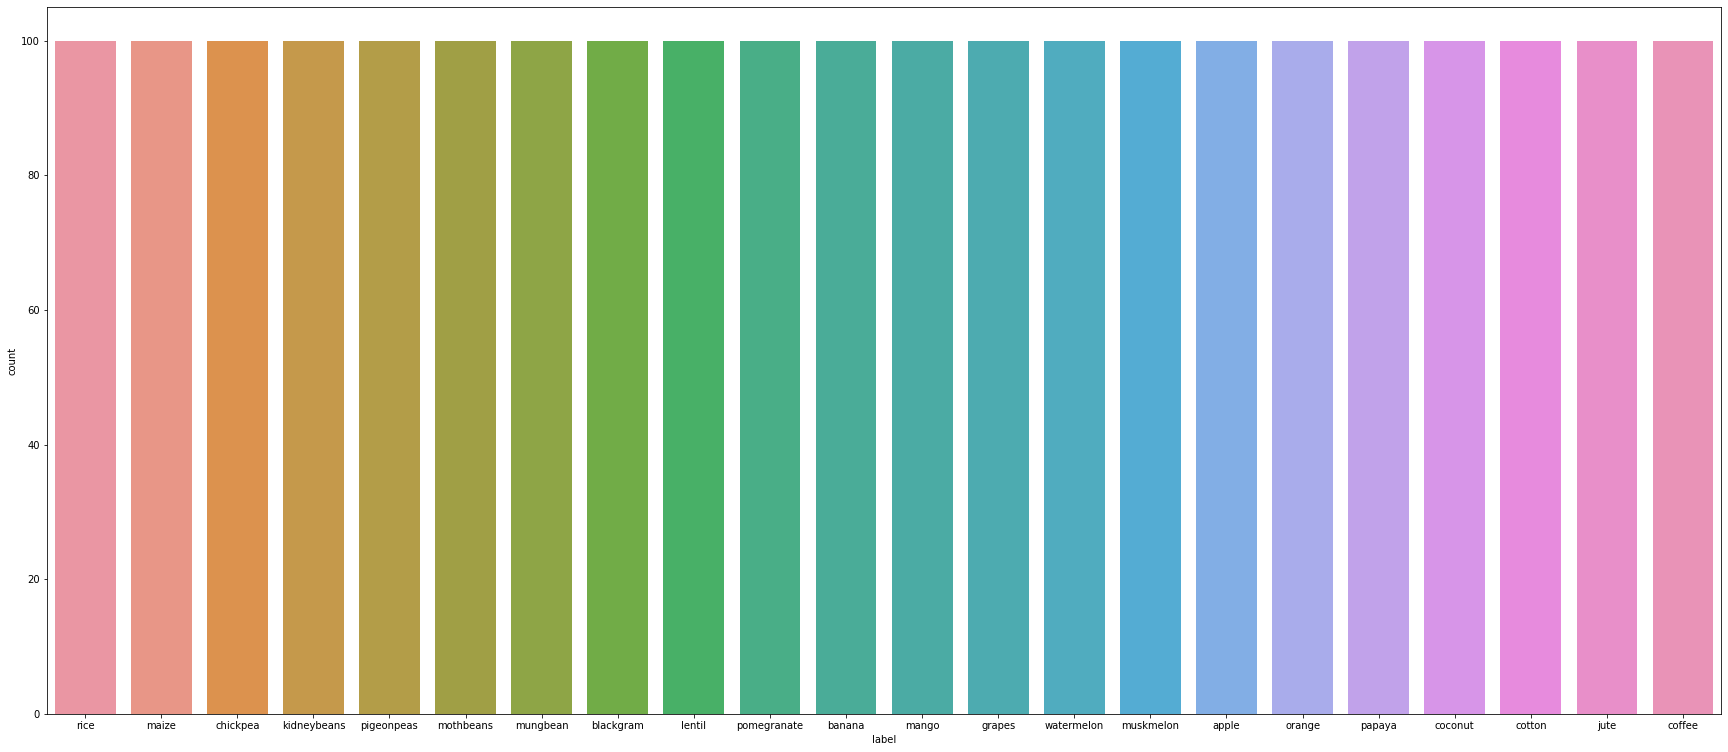

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 13))
sns.countplot(x = df['label']);

In [7]:
#separating the target variable from the features
import numpy as np

X = df.drop('label', axis=1)
y = df['label']

#calculating the gini coefficient
#counting the total number of samples
N = len(y)

#counting the number of classes 
classes = np.unique(y)

#calculating the probability of each class
prob = [np.mean(y == c) for c in classes]

#calculating the gini coefficient
gini = 1 - sum([p**2 for p in prob])

#printing the gini coefficient
print('Gini Coefficient:', gini)

Gini Coefficient: 0.9545454545454546


In [8]:
!pip install missingno --quiet

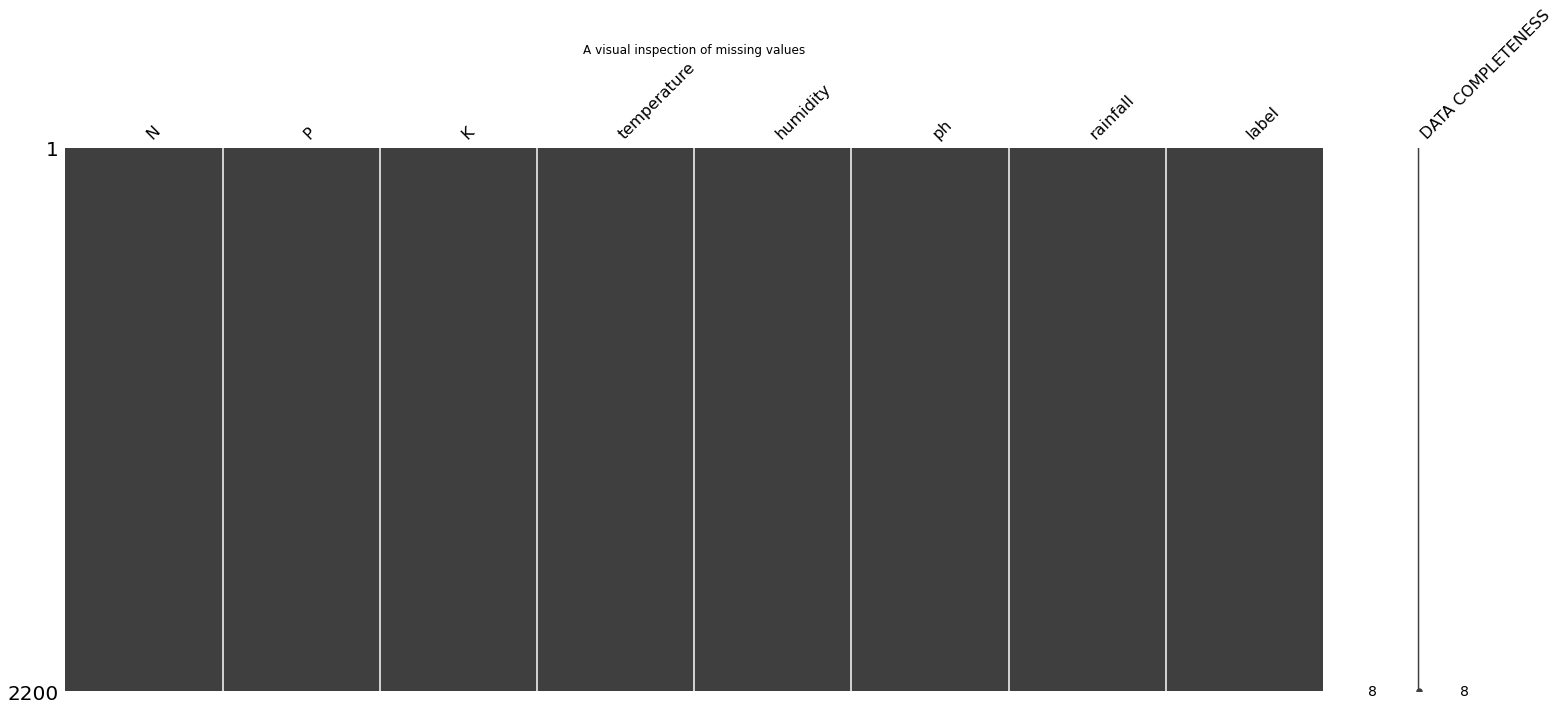

In [9]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df, labels=True, sort="descending")
plt.title("A visual inspection of missing values")
plt.show()

In [10]:
cf.unistats(df)

Count Missing Unique    Dtype Numeric     Mode      Mean      Min  \
temperature  2200       0   2200  float64    True  8.82567  25.61624  8.82567   
humidity     2200       0   2200  float64    True 14.25804  71.48178 14.25804   
ph           2200       0   2200  float64    True  3.50475   6.46948  3.50475   
rainfall     2200       0   2200  float64    True 20.21127 103.46366 20.21127   
N            2200       0    137    int64    True       22  50.55182        0   
P            2200       0    117    int64    True       60  53.36273        5   
K            2200       0     73    int64    True       17  48.14909        5   
label        2200       0     22   object   False    apple         -        -   

                 25%   Median       75%       Max      Std     Skew     Kurt  
temperature 22.76937 25.59869  28.56165  43.67549  5.06375  0.18493  1.23255  
humidity    60.26195 80.47315  89.94877  99.98188 22.26381 -1.09171  0.30213  
ph           5.97169  6.42505   6.92364   9.93509  0.77394  0.28393  1.65558  
rainfall    64.55169 94.86762 124.26751 298.56012 54.95839  0.96576  0.60708  
N           21.00000 37.00000  84.25000       140 36.91733  0.50972 -1.05824  
P           28.00000 51.00000  68.00000       145 32.98588  1.01077  0.86028  
K           20.00000 32.00000  49.00000       205 50.64793  2.37517  4.44935  
label              -        -         -         -        -        -        -

**The skewness value for humidity is slightly above -1 making it a bit left skewed while potassium (K) is greatly skewed to the right which surpasses the acceptable value of 1. K would be investigated to analyse the effect they have on the target column. The kurtosis value of K also shows alot of values with clustered together with little spread, while the value ph is a bit above the accepted value of 1 or -1. The label column is the only categorical variable within the dataset with 22 groups within the features and no observable missing values in the data**

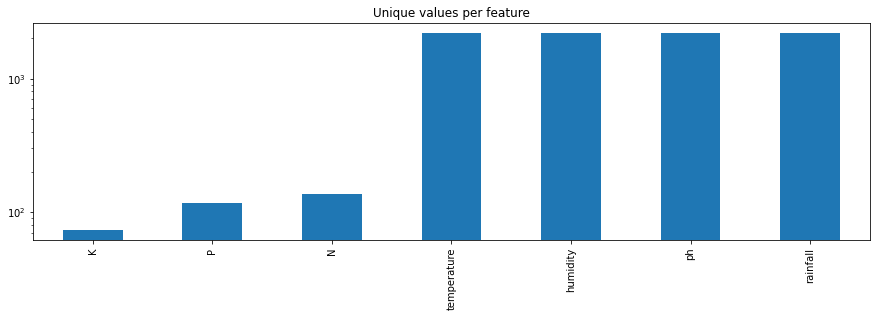

In [11]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

Feature Distribution of Each variable within the dataset.As seen below some of the feature appear normally distributed except N, P, K and humidity that resmebles a binomial distribution. While these may affect the ANOVA test on the categorical target column, we chose to use the regular ANOVA and T-Test 

**Normality Test**

In [12]:
# Perform the Shapiro-Wilk test
df_sample = df.drop('label', axis=1)
r, p = stats.shapiro(df_sample)

# Print the p-value
# print('p-value:', p)
print('Statistics=%.3f, p=%.3f' % (r, p))
# Interpret the results
if p > 0.05:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.850, p=0.000
Sample does not look Gaussian (reject H0)


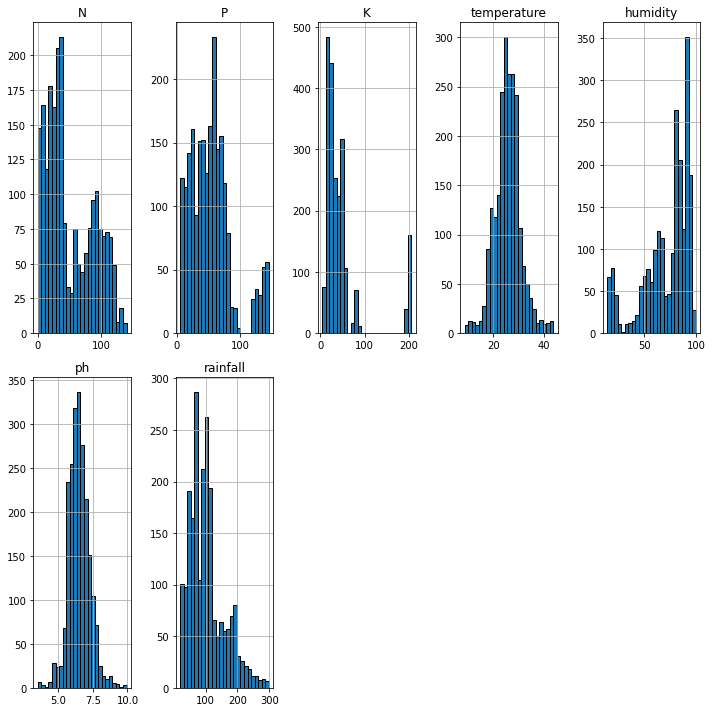

In [13]:
data_viz = pd.pivot_table(df,index=['label'],
aggfunc='mean')
df.hist(bins=25, figsize=(10, 10), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

In [14]:
df.cov()

N          P          K  temperature  humidity       ph  \
N           1362.88954 -281.86010 -262.72715      4.95462 156.73070  2.76239   
P           -281.86010 1088.06846 1229.99865    -21.30348 -87.19732 -3.52349   
K           -262.72715 1229.99865 2565.21287    -41.13423 215.21550 -6.64424   
temperature    4.95462  -21.30348  -41.13423     25.64155  23.14740 -0.06974   
humidity     156.73070  -87.19732  215.21550     23.14740 495.67731 -0.14616   
ph             2.76239   -3.52349   -6.64424     -0.06974  -0.14616  0.59898   
rainfall     119.74715 -115.73069 -148.81121     -8.37218 115.53446 -4.63920   

              rainfall  
N            119.74715  
P           -115.73069  
K           -148.81121  
temperature   -8.37218  
humidity     115.53446  
ph            -4.63920  
rainfall    3020.42447

#Numeric to Numeric Analysis

In [15]:
df.corr()

N        P        K  temperature  humidity       ph  \
N            1.00000 -0.23146 -0.14051      0.02650   0.19069  0.09668   
P           -0.23146  1.00000  0.73623     -0.12754  -0.11873 -0.13802   
K           -0.14051  0.73623  1.00000     -0.16039   0.19086 -0.16950   
temperature  0.02650 -0.12754 -0.16039      1.00000   0.20532 -0.01780   
humidity     0.19069 -0.11873  0.19086      0.20532   1.00000 -0.00848   
ph           0.09668 -0.13802 -0.16950     -0.01780  -0.00848  1.00000   
rainfall     0.05902 -0.06384 -0.05346     -0.03008   0.09442 -0.10907   

             rainfall  
N             0.05902  
P            -0.06384  
K            -0.05346  
temperature  -0.03008  
humidity      0.09442  
ph           -0.10907  
rainfall      1.00000

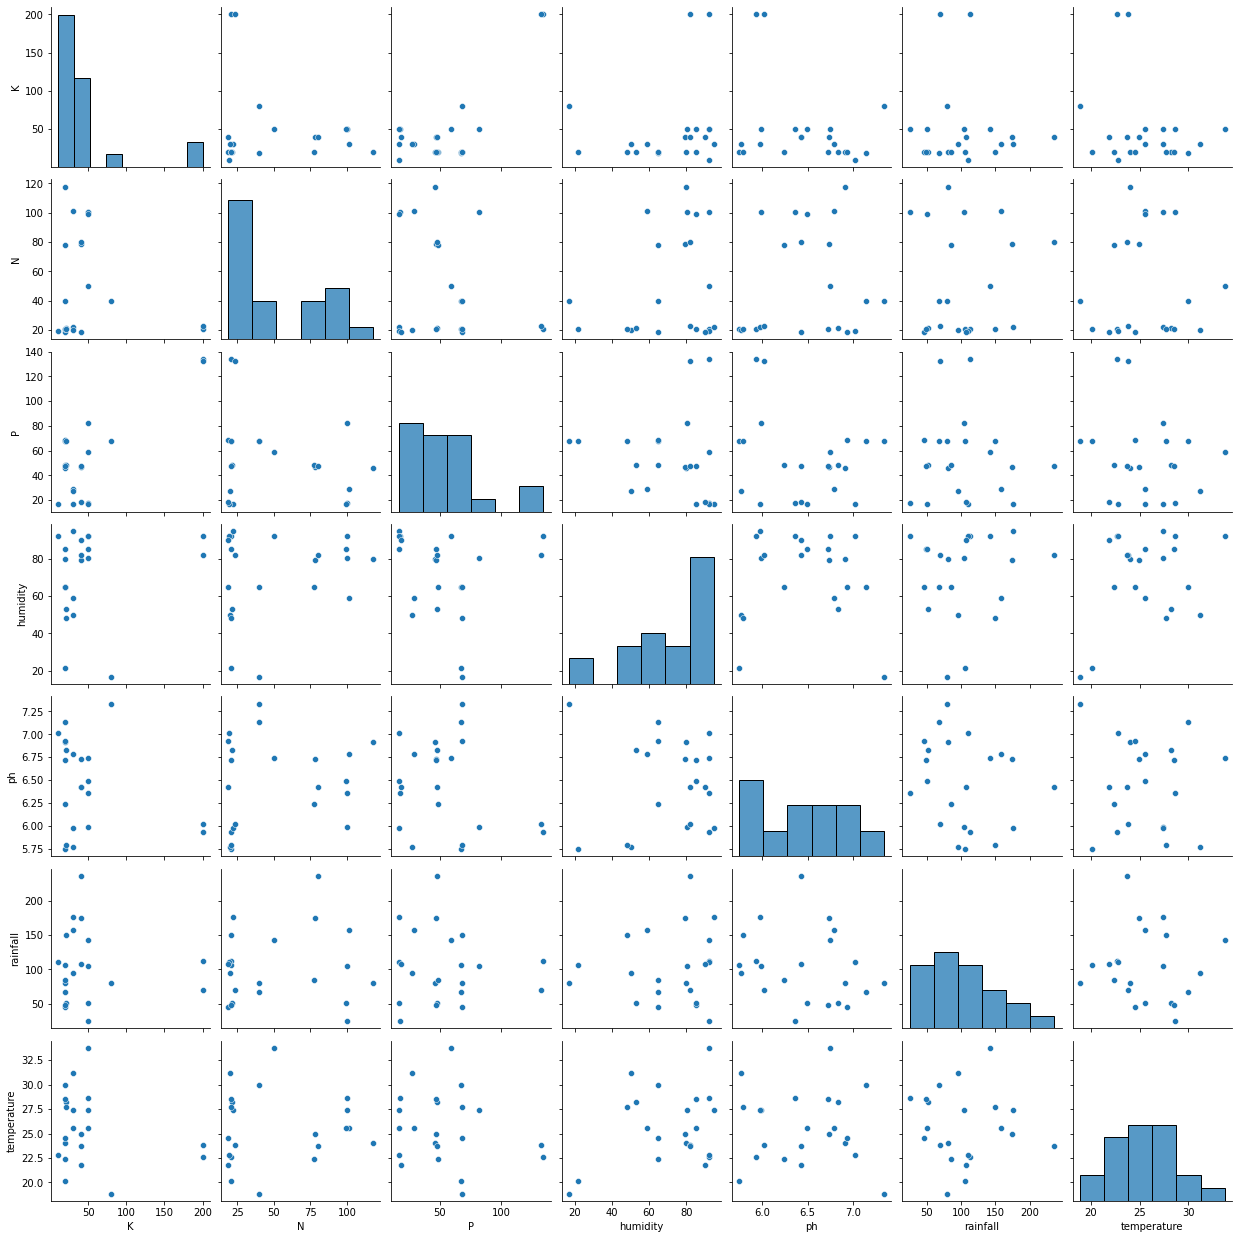

In [16]:
import seaborn as sns
sns.pairplot(data_viz);

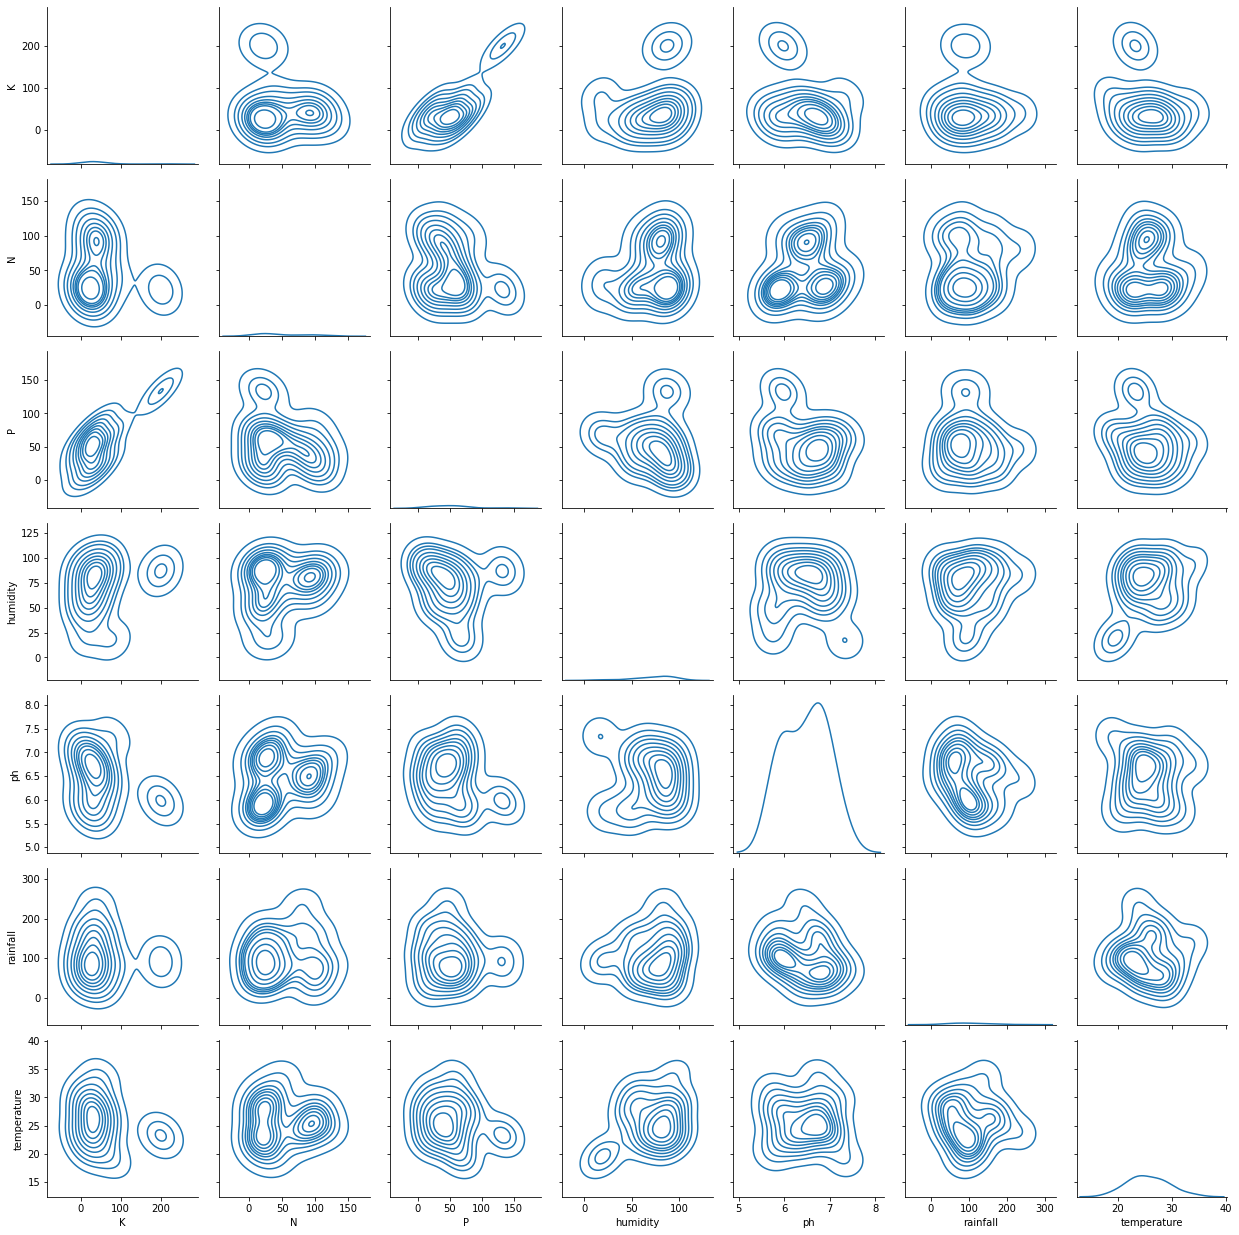

In [17]:
b = sns.PairGrid(data_viz)
b.map_diag(sns.kdeplot)
b.map_offdiag(sns.kdeplot, n_levels=10)

In [18]:
df.K.corr(df.P).round(2)

0.74

As seen from the correlation coefficients among the variables, this shows that most of the variables are independent of each other with the exception of K and P with a high value of correlation(0.74)  close to 1. We are assuming that the measure of effect size for a large correlation coefficient(r), is  r >.50

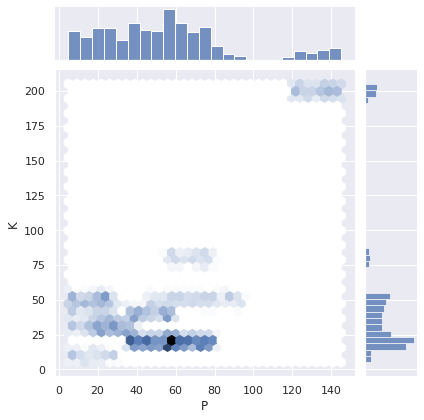

In [19]:
data_PK = pd.pivot_table(df,index=['label', 'P', 'K'])

sns.set(color_codes=True)
sns.jointplot(x='P', y='K', data=data_PK, kind='hex');

Majority of the data points are concentrated at the P(58) and K(24) points from the hexagonal dense data points on the plot.This can be implied that the concentration levels of P and K at this levels have a strong correlated effect on some of the target variables.

In [20]:
import pandas as pd
import plotly.express as px

fig = px.scatter_3d(df, x='P', y='K', z='humidity', color="N")
fig.show()

There are absolute condensation of datapoints among P, N and K, which further supports our initial assesment of a strong correlation between P and K. While N and rainfall has an interaction effect on the two macro-nutrients, humidity does not seems to affect them much, although it shows a fixed increasing values with lots of clusters around the point of convergence between P and K for certain crops.Subtituting label on the Y-axis certain concentration of P,K,N the chart shows the crops that grow at these values. 

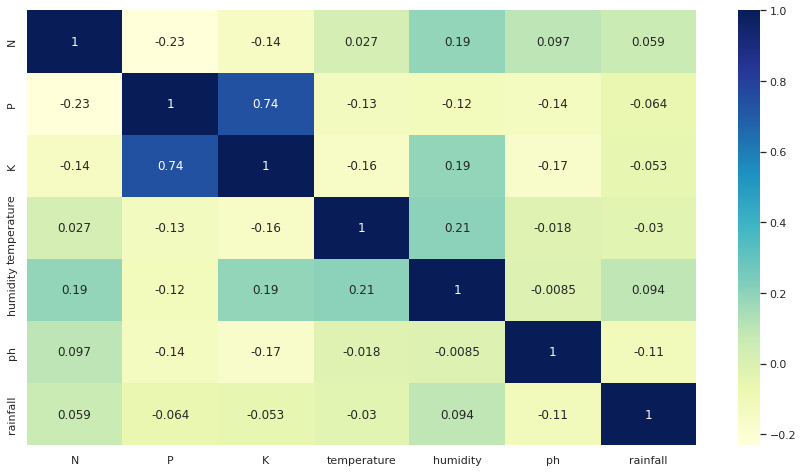

In [21]:
plt.figure(figsize=(15, 8))
dp = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [22]:
from scipy import stats
r, p = stats.pearsonr(df['P'], df['humidity'])

print('r: ' + str(round(r, 4)))
print('p: ' + str(round(p, 4)))

r: -0.1187
p: 0.0


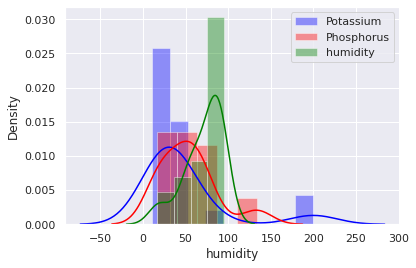

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(data_viz.K, color="blue", label="Potassium")
sns.distplot(data_viz.P, color="red", label="Phosphorus")
sns.distplot(data_viz.humidity, color="green", label="humidity")
plt.legend()
plt.show()

K and P showed normal distribution plot in with lots of data spread across each other with relatively close mean, while P shows a slight rise during the decline phase that projects a binomial nature but quickly decreases. Consequently, the plot of humidity on the same chart showed a neglible difference in its mean to that of the P and K, but a corresponding spread that overlay the other two features. 

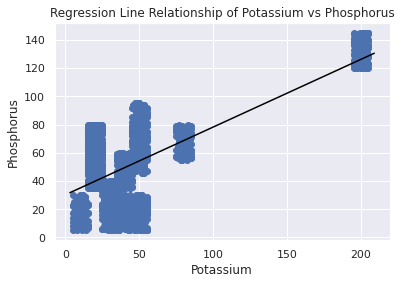

In [24]:
import matplotlib.pyplot as plt
from scipy import stats
m, b, r, p, err = stats.linregress(df.K, df.P)

x = range(3, 210)
y = m * x + b

plt.plot(x, y, color="black")
plt.scatter(df.K, df.P)
plt.title('Regression Line Relationship of Potassium vs Phosphorus')
plt.xlabel('Potassium')
plt.ylabel('Phosphorus')
plt.show()

**This shows an upward trend between the two features.As the values of K increases in the soil sample, the values of P also increases, indicating a linear relationship between both features. However the diagram shows segmentations of clusters within the 0 - 100 values of both features and a separate cluster at the highest values of both features.** 

In [25]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

for i, col in enumerate(df):
  for i2, col2 in enumerate(df):
    if i2 > i:
      if pd.api.types.is_numeric_dtype(df[col]) and pd.api.types.is_numeric_dtype(df[col2]):
        model = ols(formula = col + '~' + col2, data=df).fit()
        print(col, col2)
        white_test = het_white(model.resid, model.model.exog)
        breuschpagen_test = het_breuschpagan(model.resid, model.model.exog)

        output_df = pd.DataFrame(columns=['LM stat', 'LM p', 'F stat', 'F stat p'])
        output_df.loc['white'] = white_test
        output_df.loc['Breusch-Pagen'] = breuschpagen_test
        output_df
output_df        

N P
N K
N temperature
N humidity
N ph
N rainfall
P K
P temperature
P humidity
P ph
P rainfall
K temperature
K humidity
K ph
K rainfall
temperature humidity
temperature ph
temperature rainfall
humidity ph
humidity rainfall
ph rainfall


LM stat    LM p   F stat  F stat p
white         14.74069 0.00063  7.40994   0.00062
Breusch-Pagen 13.42166 0.00025 13.49177   0.00025

In [26]:
model = ols(formula = 'P~K', data=df).fit()

white_test = het_white(model.resid, model.model.exog)
breuschpagen_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM stat', 'LM p', 'F stat', 'F stat p'])
output_df.loc['white'] = white_test
output_df.loc['Breusch-Pagen'] = breuschpagen_test
output_df

LM stat    LM p   F stat  F stat p
white         130.85904 0.00000 69.47263   0.00000
Breusch-Pagen  79.56313 0.00000 82.47345   0.00000

From the heteroscedasticity for a combination of all numeric columns, the p-values for the white and breuschpagen tests are  insignificant while the F stat and LM stat are significant.Showing that the features have even spread when they are plotted against each other. The same result seen in the test and plot of P, K and humidity.

In [27]:
from scipy import stats
corr_df = pd.DataFrame(columns=['r', 'p'])
for i, col1 in enumerate(df):
  for i2, col2 in enumerate(df):
    if i2 < i:
      if col1 != 'label' and col2 != 'label':
        r, p = stats.pearsonr(df[col1], df[col2])
        # print(col1, col2 +' -> r: ' + str(round(r, 4)))
        # print(col1, col2 +' -> p: ' + str(round(p, 4)))
        corr_df.loc[col1] = [round(r, 3), round(p, 3)]  
        corr_df.loc[col2] = [round(r, 3), round(p, 3)]   
corr_df

r       p
P           -0.06400 0.00300
N            0.05900 0.00600
K           -0.05300 0.01200
temperature -0.03000 0.15800
humidity     0.09400 0.00000
ph          -0.10900 0.00000
rainfall    -0.10900 0.00000

**The low p-values for all the variables shows a likelyhood that if another random sample of 2200 entries was collected from the population, it is likely to see the same negative correlation values of P,K,temperature, ph, and rainfall and the same postive correlation for N and humidity.**

**Categorical Label to Numeric Feature Analysis**

In [28]:
from scipy import stats
import statistics as stat
import numpy as np

def anova(feature, label):
  groups = df[label].unique()
  grouped_values = []
  for group in groups:
    grouped_values.append(df[df[label] == group][feature])
  return stats.f_oneway(*grouped_values)

In [29]:
print(anova('N', 'label'))
print(anova('K', 'label'))
print(anova('P', 'label'))
print(anova('temperature', 'label'))
print(anova('humidity', 'label'))
print(anova('rainfall', 'label'))
print(anova('ph', 'label'))

F_onewayResult(statistic=897.5681863257125, pvalue=0.0)
F_onewayResult(statistic=27238.36206707328, pvalue=0.0)
F_onewayResult(statistic=1885.657859184262, pvalue=0.0)
F_onewayResult(statistic=102.18698122995393, pvalue=4.019323818173197e-305)
F_onewayResult(statistic=3103.708891217461, pvalue=0.0)
F_onewayResult(statistic=605.5279661441423, pvalue=0.0)
F_onewayResult(statistic=60.344033529413736, pvalue=6.493161898840498e-199)


**All features appears to have a large effect size on the labels, which shows a statistically significant F-values and low p-values.Certain labels respond significanly to some independent features while other have minimal effect on them.Hence the effect of each column on the type of fruit planted is quite significant, notably K, P, humidity and N**

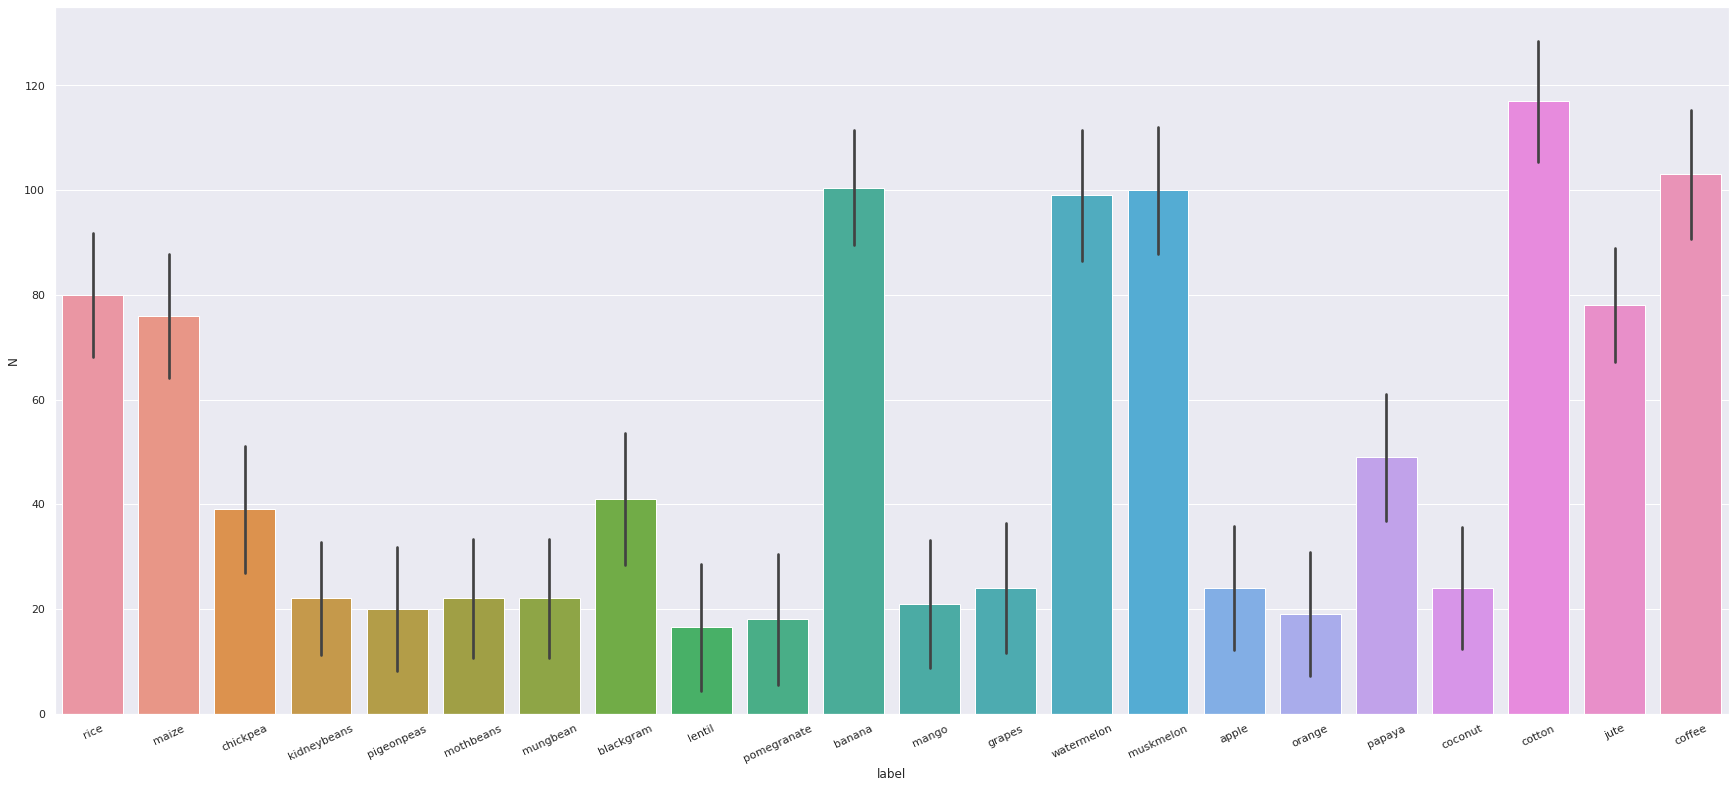

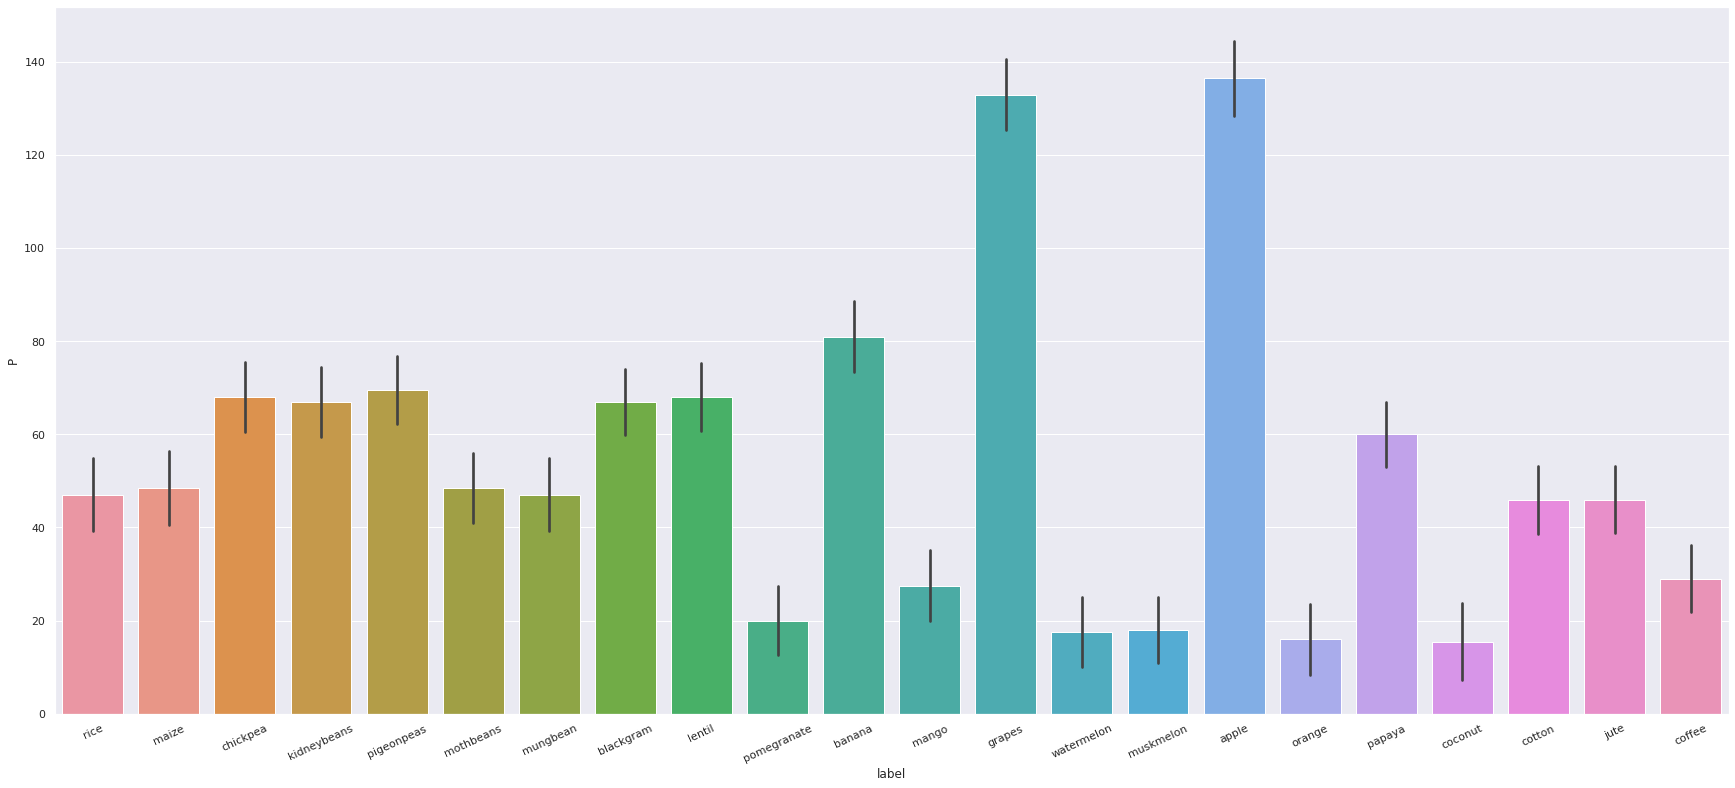

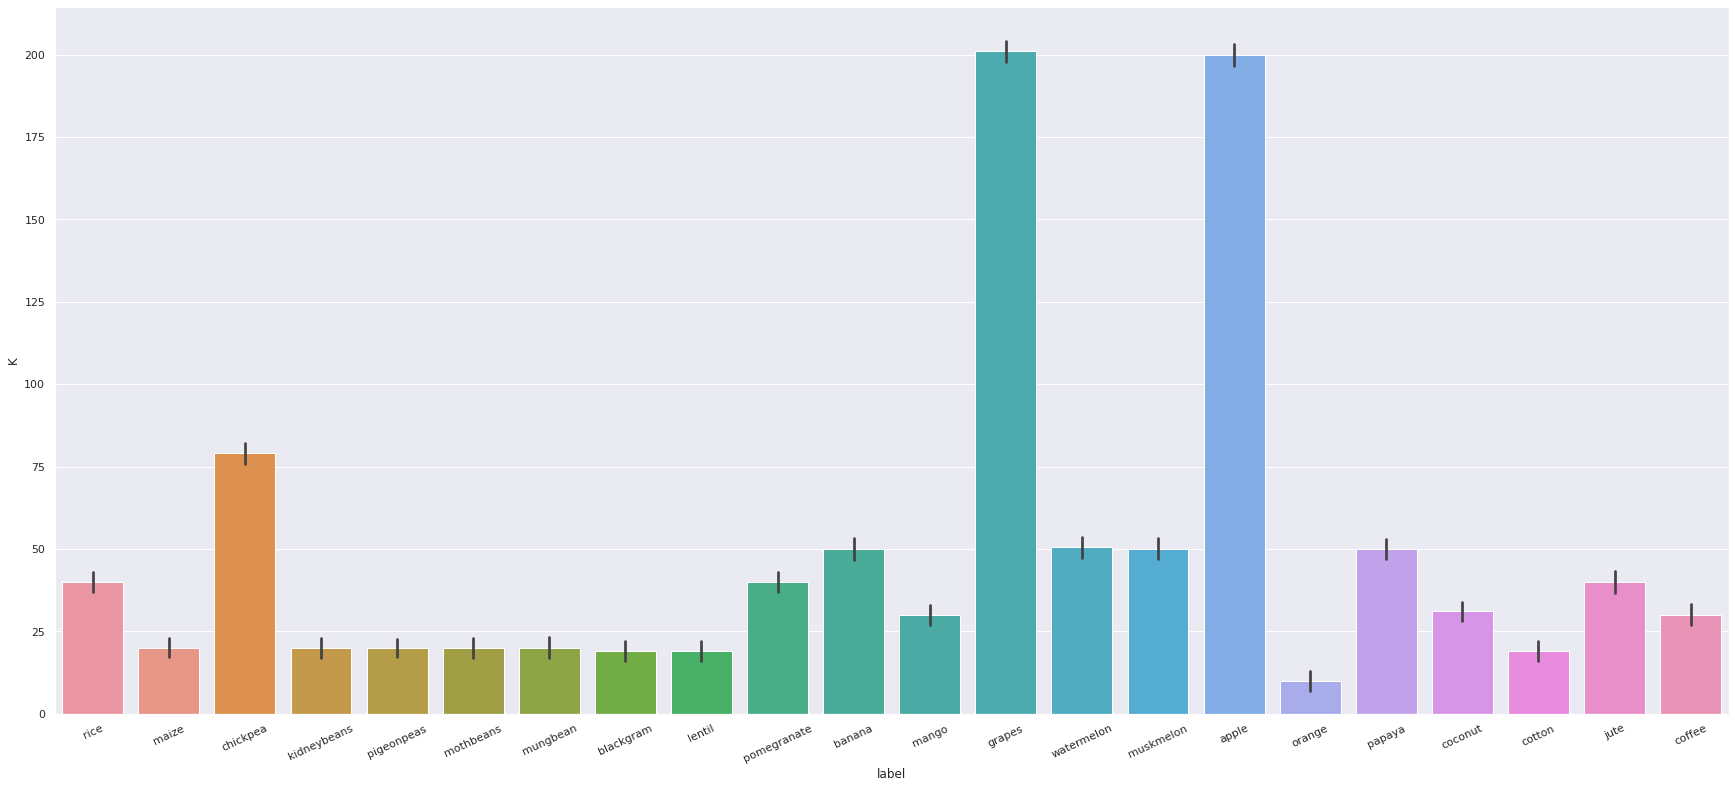

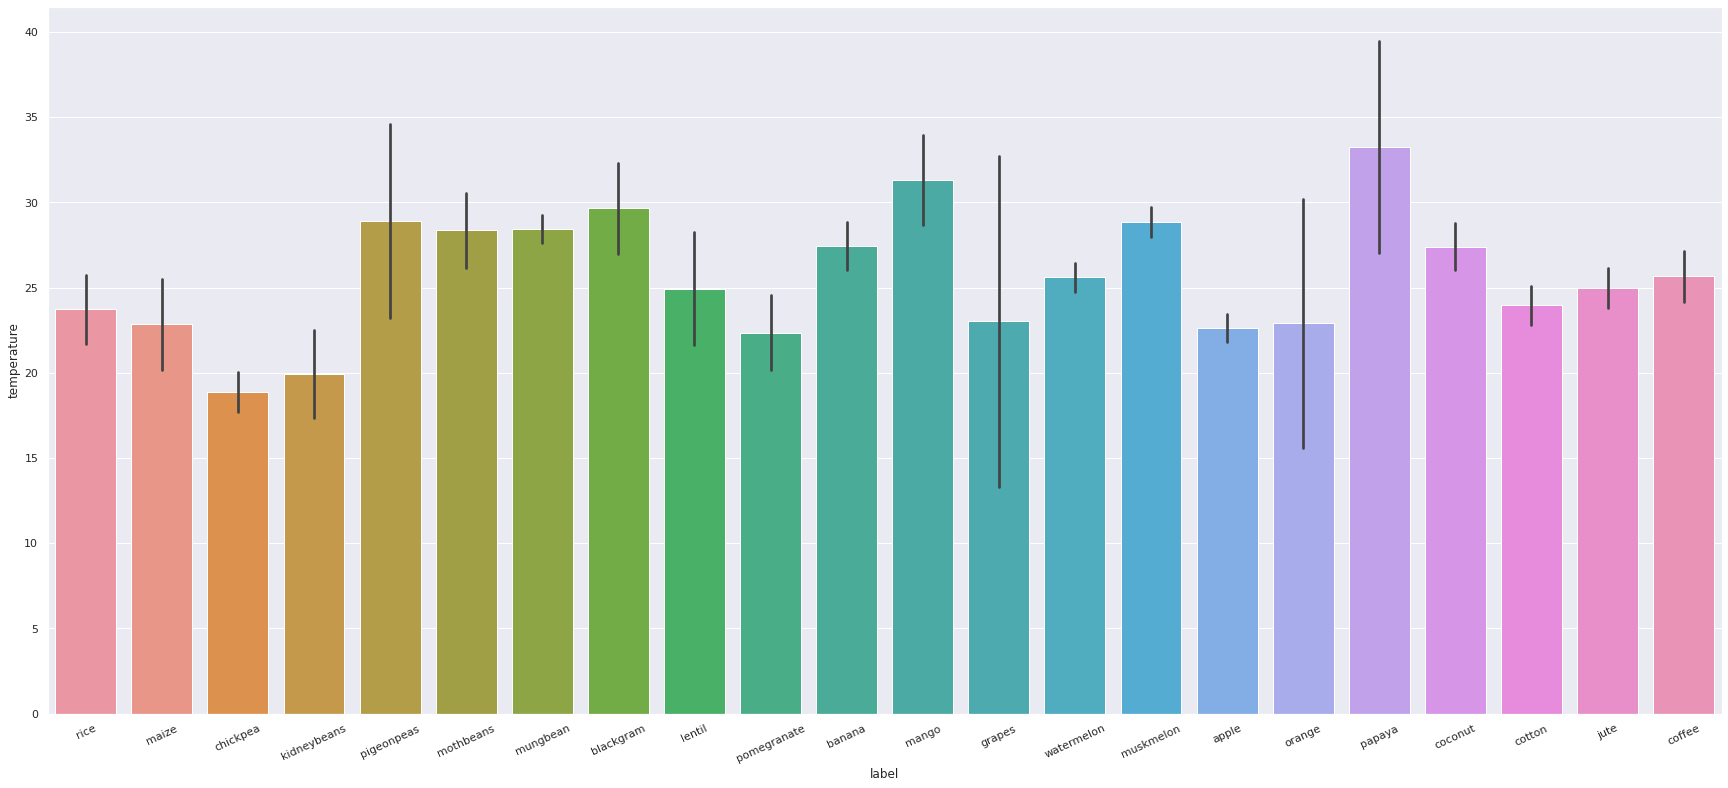

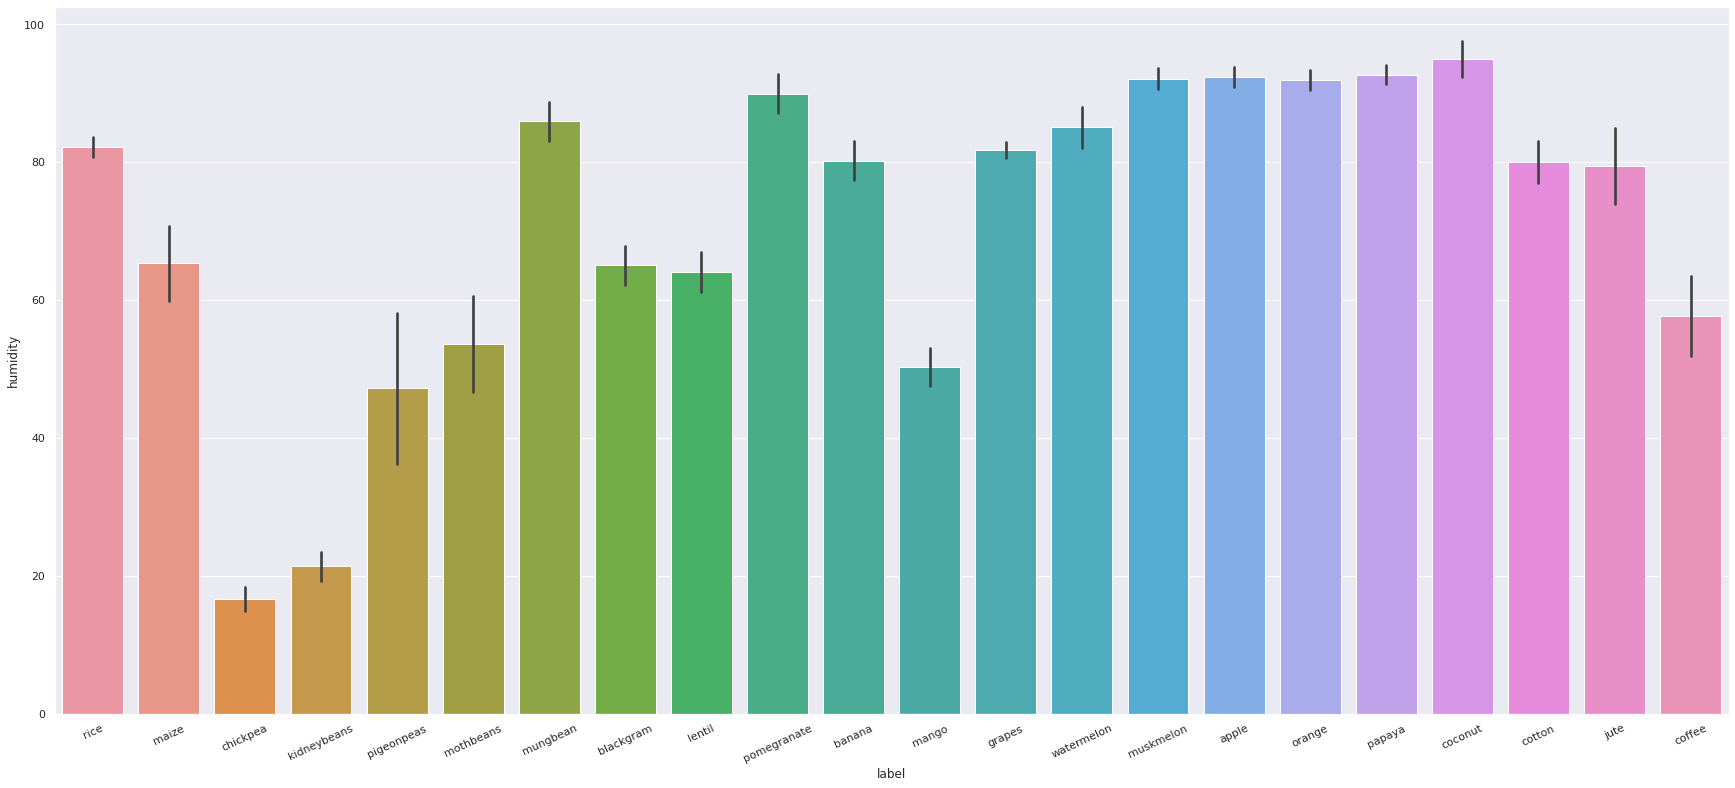

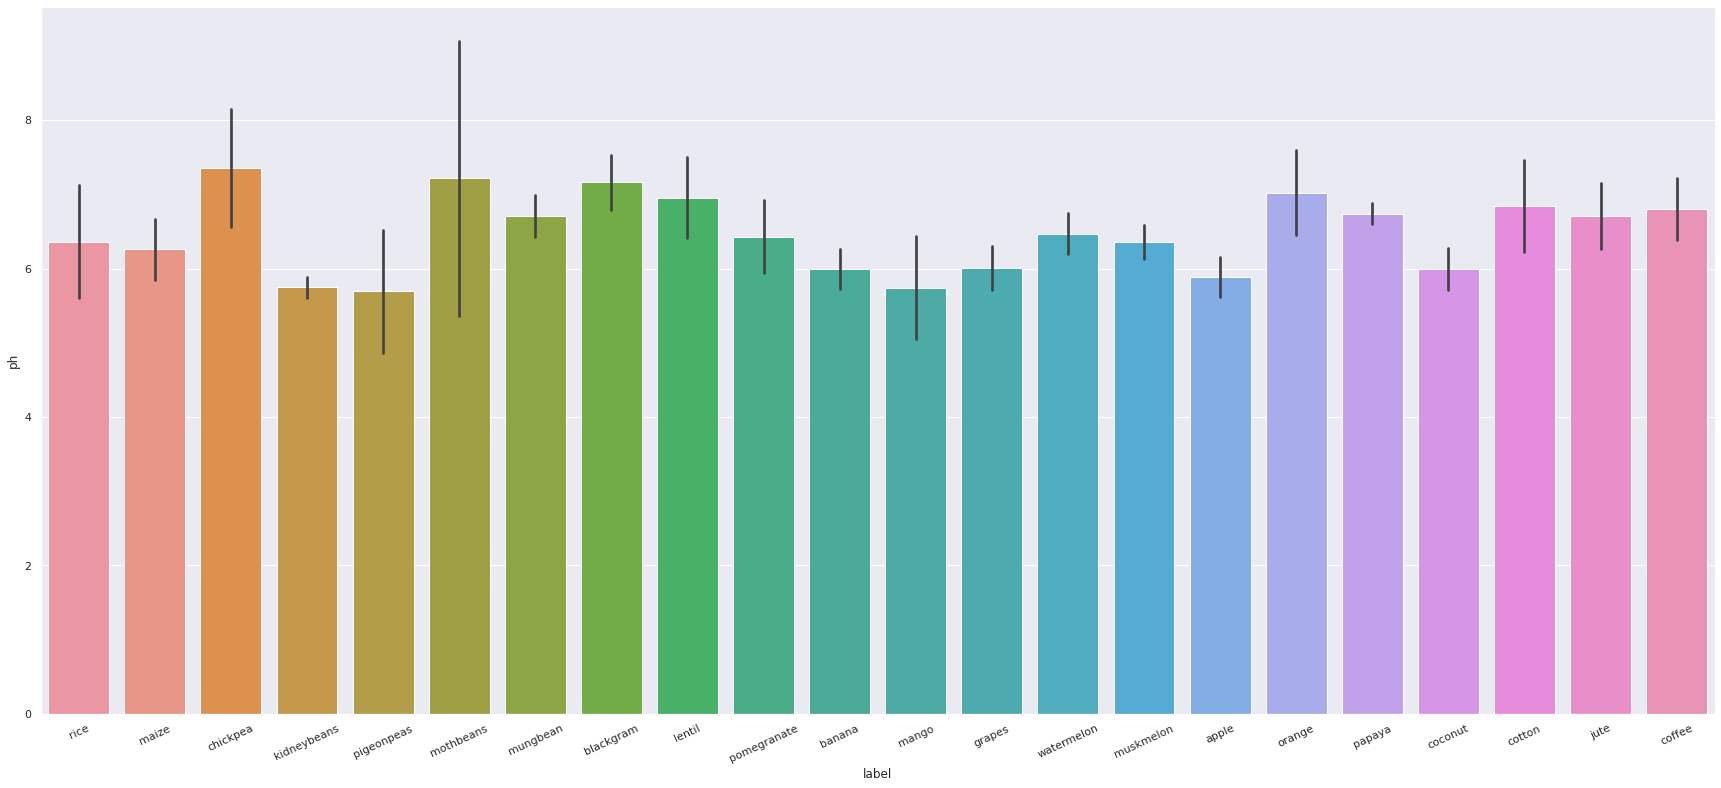

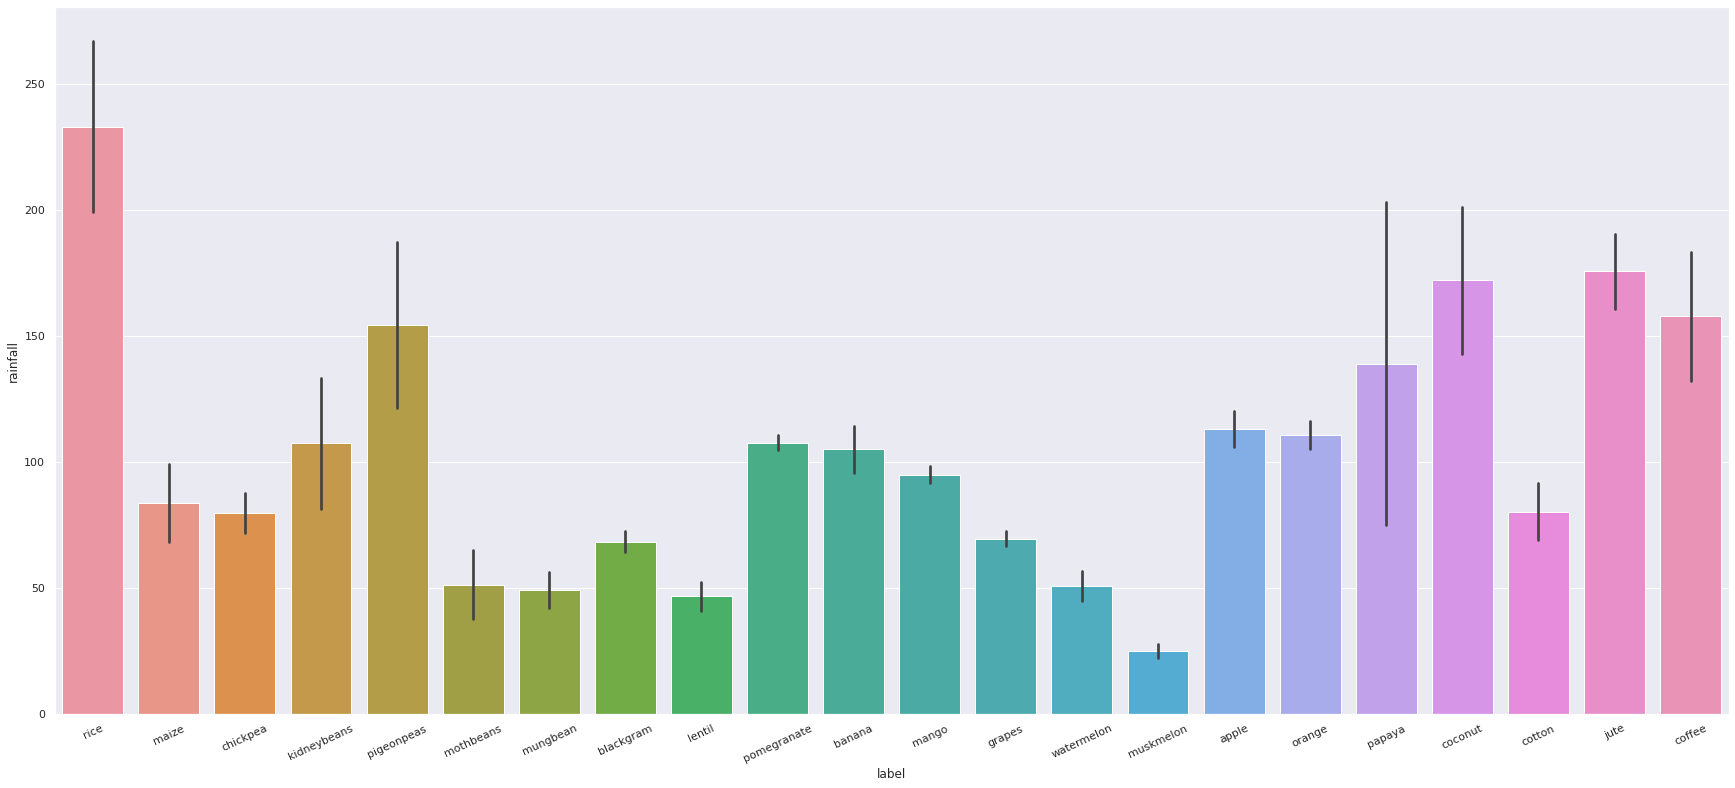

In [30]:

for y in df:
  if pd.api.types.is_numeric_dtype(df[y]):
    plt.figure(figsize=(30, 13))
    viz = sns.barplot(x=df['label'], y=df[y], estimator=np.median, ci='sd');
    viz.set_xticklabels(viz.get_xticklabels(), rotation=25);

**Variance of each feature on a crop appears constant, as seen by the tick marks above each label, but the effect of some variables on some crops appears to have larger variance. For example the standard deviation or amount of error of rainfall on papaya, pigeonpea, rice, coffee and kidney beans are larger than the average SD of other crops, same as in ph on mothbeans, temperature on grapes, oranges and pigeon peas and humidity on pigeon peas.**

In [31]:
#Selecting Weather features for analysis

weather_df = df[['temperature', 'humidity', 'rainfall']]
ecology_df = df[['N', 'P', 'K', 'ph']]
label_df = df.iloc[:,-1]

ecology = pd.concat([ecology_df, label_df], axis='columns')
weather = pd.concat([weather_df, label_df], axis='columns')

ecology.set_index('label', inplace=True)
# weather.set_index('label', inplace=True)


ecology = pd.pivot_table(ecology,index=['label'],
aggfunc='mean')

weather = pd.pivot_table(weather,index=['label'],
aggfunc='mean')


In [32]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from random import randint
import random 
colors = []

for i in range(50):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

sorted_K = ecology.sort_values(by='K',
ascending=False)
fig = make_subplots(rows=1, cols=2)
top = {
'y' : sorted_K['K'][0:10].sort_values().index,
'x' : sorted_K['K'][0:10].sort_values()
}
last = {
'y' : sorted_K['K'][-10:].index,
'x' : sorted_K['K'][-10:]
}
fig.add_trace(
go.Bar(top,
name="Most potassium required",
marker_color=random.choice(colors),
orientation='h',
text=top['x']),
row=1, col=1
)
fig.add_trace(
go.Bar(last,
name="Least potassium required",
marker_color=random.choice(colors),
orientation='h',
text=last['x']),
row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
plot_bgcolor='white',
font_size=10,
font_color='black',
height=500)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()
    

In [33]:
sorted_N = ecology.sort_values(by='N',
ascending=False)
fig = make_subplots(rows=1, cols=2)
top = {
'y' : sorted_N['N'][0:10].sort_values().index,
'x' : sorted_N['N'][0:10].sort_values()
}
last = {
'y' : sorted_N['N'][-10:].index,
'x' : sorted_N['N'][-10:]
}
fig.add_trace(
go.Bar(top,
name="Most nitrogen required",
marker_color=random.choice(colors),
orientation='h',
text=top['x']),
row=1, col=1
)
fig.add_trace(
go.Bar(last,
name="Least nitrogen required",
marker_color=random.choice(colors),
orientation='h',
text=last['x']),
row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
plot_bgcolor='white',
font_size=10,
font_color='black',
height=500)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()
    

In [34]:
sorted_P = ecology.sort_values(by='P',
ascending=False)
fig = make_subplots(rows=1, cols=2)
top = {
'y' : sorted_P['P'][0:10].sort_values().index,
'x' : sorted_P['P'][0:10].sort_values()
}
last = {
'y' : sorted_P['P'][-10:].index,
'x' : sorted_P['P'][-10:]
}
fig.add_trace(
go.Bar(top,
name="Most phosphorus required",
marker_color=random.choice(colors),
orientation='h',
text=top['x']),
row=1, col=1
)
fig.add_trace(
go.Bar(last,
name="Least phosphorus required",
marker_color=random.choice(colors),
orientation='h',
text=last['x']),
row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
plot_bgcolor='white',
font_size=10,
font_color='black',
height=500)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()
    

In [35]:
sorted_ph = ecology.sort_values(by='ph',
ascending=False)
fig = make_subplots(rows=1, cols=2)
top = {
'y' : sorted_ph['ph'][0:10].sort_values().index,
'x' : sorted_ph['ph'][0:10].sort_values()
}
last = {
'y' : sorted_ph['ph'][-10:].index,
'x' : sorted_ph['ph'][-10:]
}
fig.add_trace(
go.Bar(top,
name="Most pH required",
marker_color=random.choice(colors),
orientation='h',
text=top['x']),
row=1, col=1
)
fig.add_trace(
go.Bar(last,
name="Least pH required",
marker_color=random.choice(colors),
orientation='h',
text=last['x']),
row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="power of Hydrogen (pH)",
plot_bgcolor='white',
font_size=10,
font_color='black',
height=500)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()
    

In [36]:
fig = go.Figure()
fig.add_trace(go.Bar(
x=ecology.index,
y=ecology['N'],
name='Nitrogen',
marker_color='#0061ff'
))
fig.add_trace(go.Bar(
x=ecology.index,
y=ecology['P'],
name='Phosphorous',
marker_color='#60efff'
))
fig.add_trace(go.Bar(
x=ecology.index,
y=ecology['K'],
name='Potassium',
marker_color='#e81cff'
))
fig.add_trace(go.Bar(
x=ecology.index,
y=ecology['ph'],
name='PH',
marker_color='#a9ff68'
))
fig.update_layout(title="Composition of Soil Nutrients and PH for each Crop",
plot_bgcolor='white',
barmode='group',
xaxis_tickangle=-45)
fig.show()


For each crop the soil composition of a certain nutrient varies while as observed PH appeared to range between 7 and 5 meaning mostly acidic solutions.

In [37]:
fig = px.bar(data_viz, x=data_viz.index, y=["rainfall", "temperature", "humidity"])
fig.update_layout(title_text="Crop Weather Conditions",
plot_bgcolor='white',
height=500)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Plot shows the amount of climatic conditions needed for each crop farming.

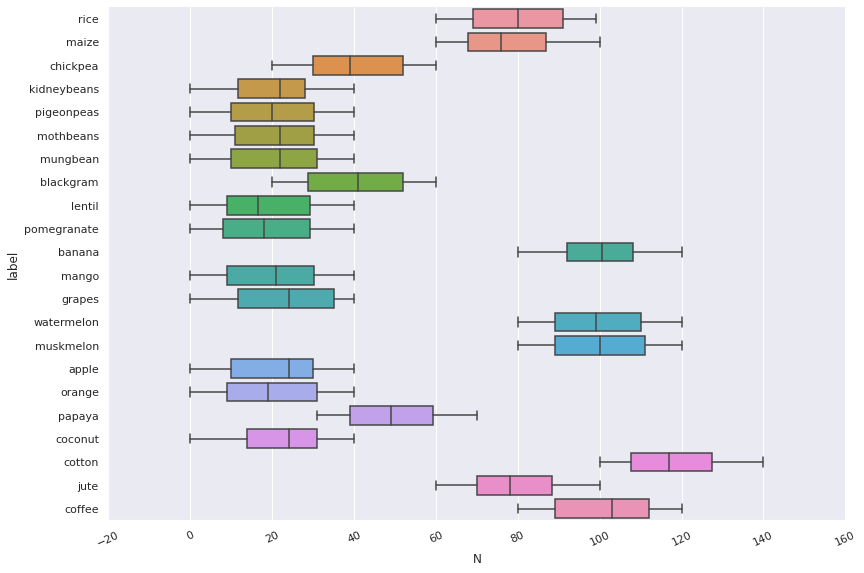

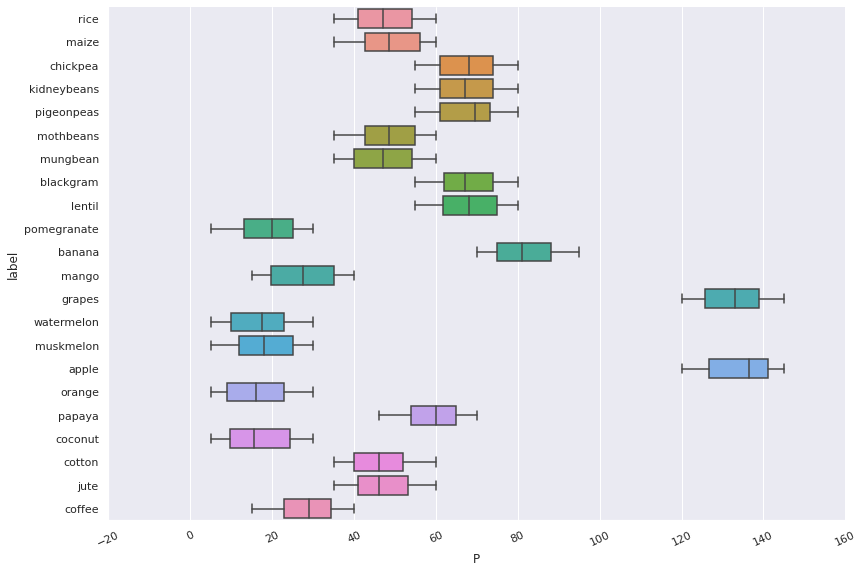

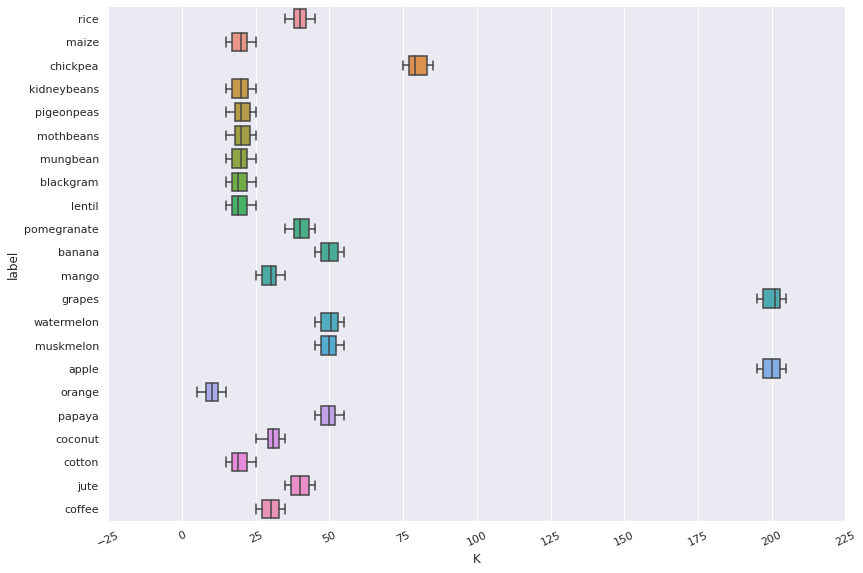

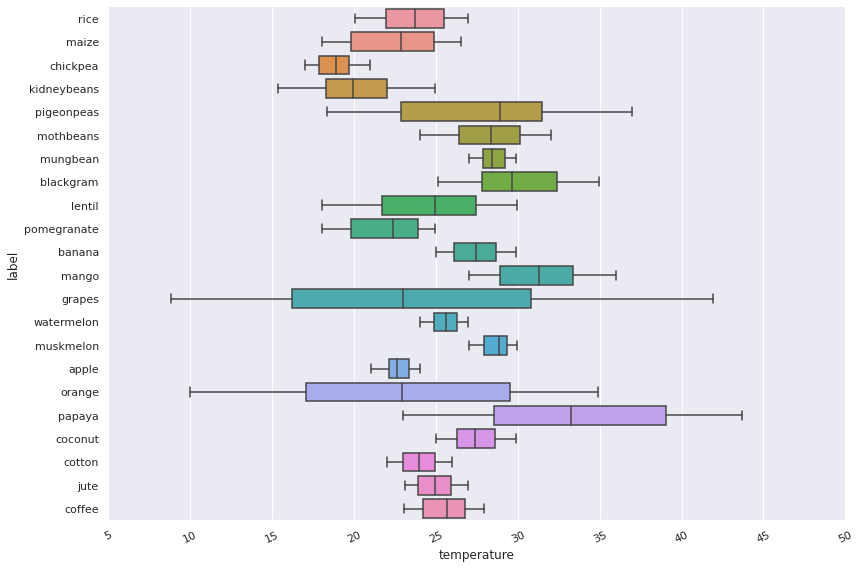

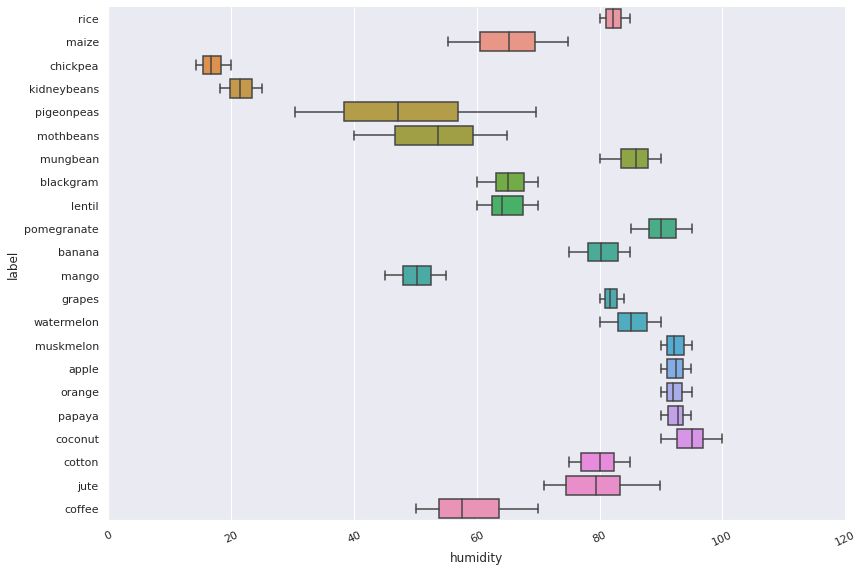

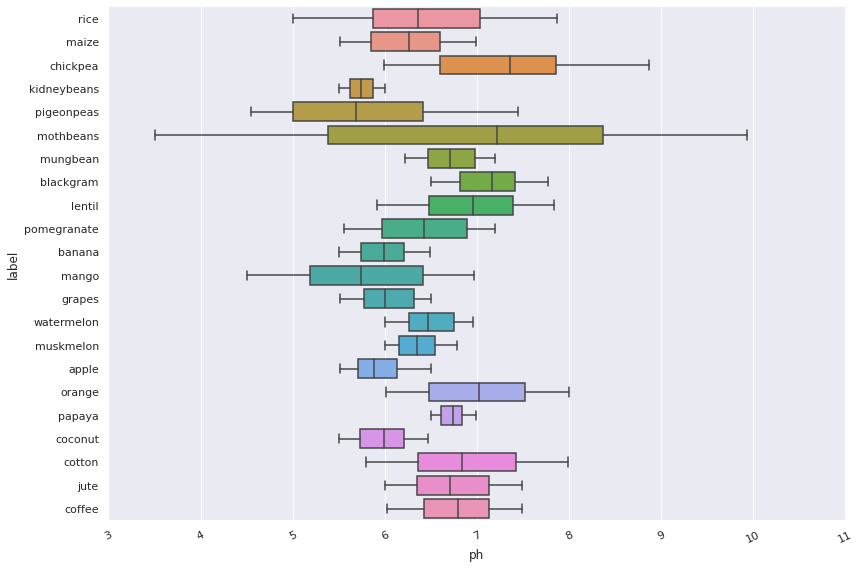

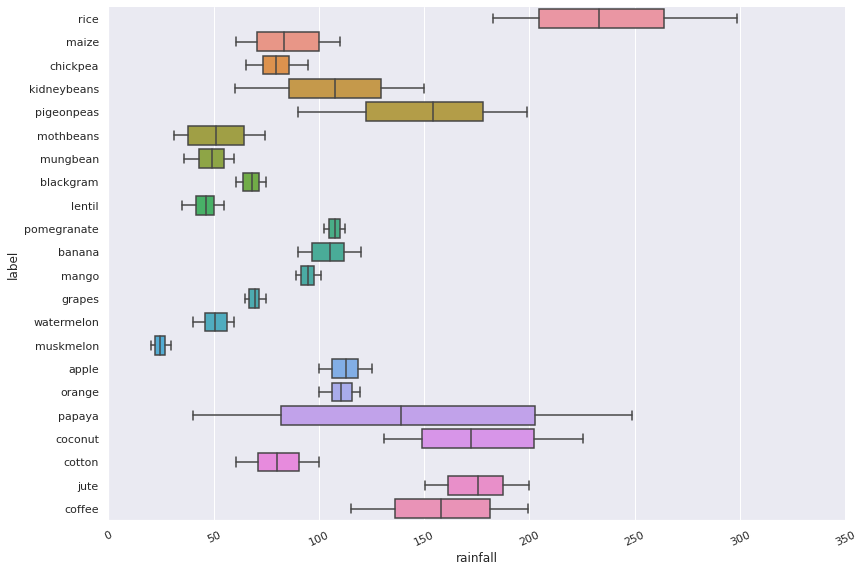

In [38]:
for y in df:
  if pd.api.types.is_numeric_dtype(df[y]):
    viz = sns.catplot(data=df, x=y, y='label', height=8, aspect=1.5, estimator=np.median, ci='sd', kind='box')
    viz.set_xticklabels(rotation=25)
    plt.show()

In [39]:
# Comparison of macro-nutrients with label and weather with label

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower    upper  reject
---------------------------------------------------------------
      apple      banana    79.43    0.0   73.356  85.504   True
      apple   blackgram    19.22    0.0   13.146  25.294   True
      apple    chickpea    19.29    0.0   13.216  25.364   True
      apple     coconut     1.18    1.0   -4.894   7.254  False
      apple      coffee     80.4    0.0   74.326  86.474   True
      apple      cotton    96.97    0.0   90.896 103.044   True
      apple      grapes     2.38 0.9989   -3.694   8.454  False
      apple        jute     57.6    0.0   51.526  63.674   True
      apple kidneybeans    -0.05    1.0   -6.124   6.024  False
      apple      lentil    -2.03 0.9999   -8.104   4.044  False
      apple       maize    56.96    0.0   50.886  63.034   True
      apple       mango    -0.73    1.0   -6.804   5.344  False
      apple   mothbeans     0.64    1.0 

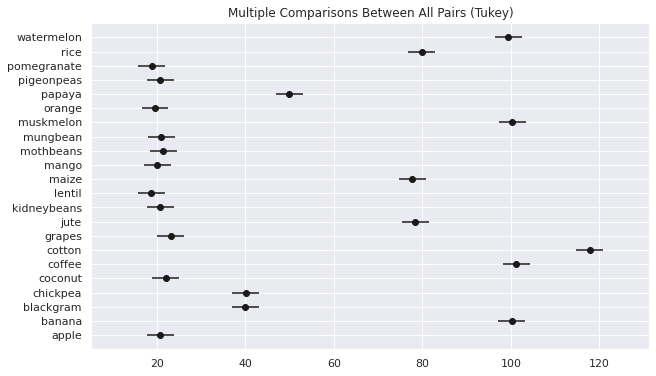

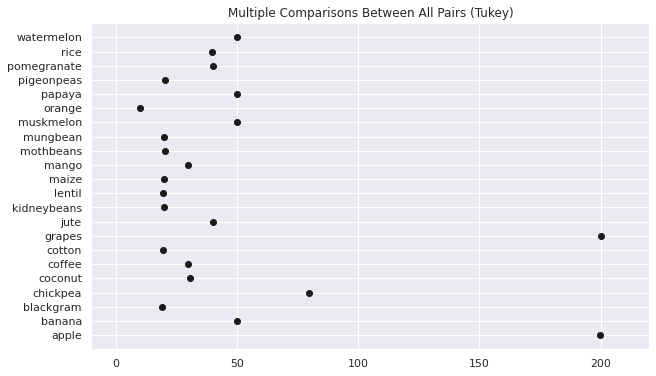

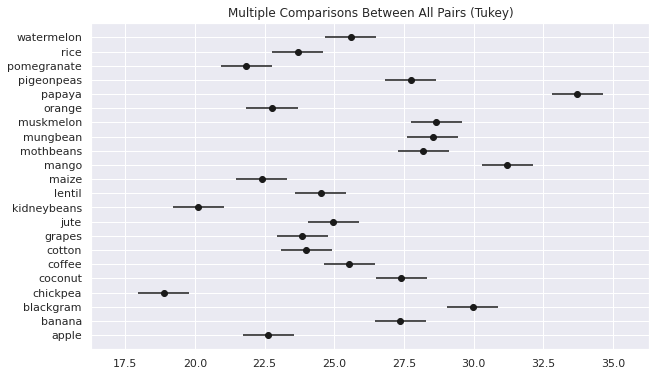

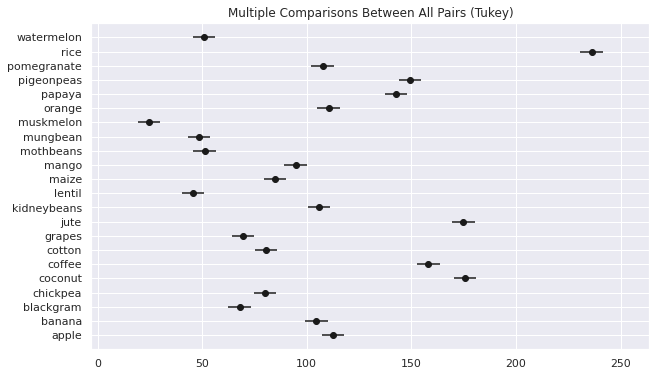

In [40]:
from statsmodels.stats.multicomp import MultiComparison

for col in df:
  if pd.api.types.is_numeric_dtype(df[col]):
    mc = MultiComparison(df[col], df['label'])
    comp_variables = mc.tukeyhsd()
    print(comp_variables)
    comp_variables.plot_simultaneous()

The pairwise comparison of the label categorical values to the variables, presents values of an adjusted p-value, making it difficult to get below 0.05.The only relivant value are statistiically significant when they are True, suggesting that the comparison of large number of combinations would not yield a significant value based on luck.

In [41]:
l_types = df.label.unique()
ttests = []
for i, e in enumerate(l_types):
  for i2, e2 in enumerate(l_types):
    for col in df:
      if pd.api.types.is_numeric_dtype(df[col]):
        if i2 > i:
          g1 = df[df['label'] == e][col]
          g2 = df[df['label'] == e2][col]
          t, p = stats.ttest_ind(g1, g2)

          ttests.append([f'{e} - {e2}:', t.round(4), p.round(4)])


threshold = 0.05 / len(ttests)
print(f'Significant t-tests bonferonni below {threshold}')
for t in ttests:
  if t[2] <= threshold:
    print(t)


Significant t-tests bonferonni below 3.0921459492888065e-05
['rice - maize:', 48.232, 0.0]
['rice - maize:', 30.5146, 0.0]
['rice - maize:', 40.2144, 0.0]
['rice - chickpea:', 23.3844, 0.0]
['rice - chickpea:', -18.5486, 0.0]
['rice - chickpea:', -91.1171, 0.0]
['rice - chickpea:', 20.5477, 0.0]
['rice - chickpea:', 294.2246, 0.0]
['rice - chickpea:', -8.2096, 0.0]
['rice - chickpea:', 44.3528, 0.0]
['rice - kidneybeans:', 36.7181, 0.0]
['rice - kidneybeans:', -18.2353, 0.0]
['rice - kidneybeans:', 46.3271, 0.0]
['rice - kidneybeans:', 10.8341, 0.0]
['rice - kidneybeans:', 234.2199, 0.0]
['rice - kidneybeans:', 8.6421, 0.0]
['rice - kidneybeans:', 30.222, 0.0]
['rice - pigeonpeas:', 35.2006, 0.0]
['rice - pigeonpeas:', -18.7332, 0.0]
['rice - pigeonpeas:', 48.0499, 0.0]
['rice - pigeonpeas:', -6.6807, 0.0]
['rice - pigeonpeas:', 30.9463, 0.0]
['rice - pigeonpeas:', 5.5794, 0.0]
['rice - pigeonpeas:', 18.2262, 0.0]
['rice - mothbeans:', 35.5248, 0.0]
['rice - mothbeans:', 46.3307, 0.0]


Bonefferoni ttest comparison was implemented to explore the significance of two crop comparison on on each feature. A Pairwise comparison is implement, which is carried by setting a threshold for p-values. Threshold is set, by dividing 0.05 accepted cutoff, with length of t-test, and it gives us only the statistically significant p-value for label combination with each feature.

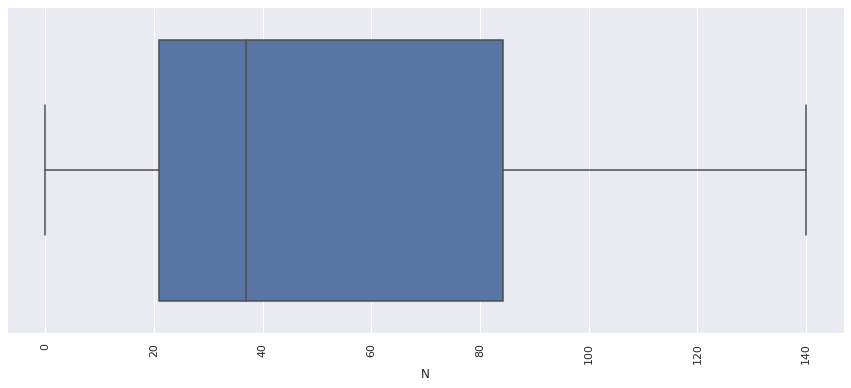

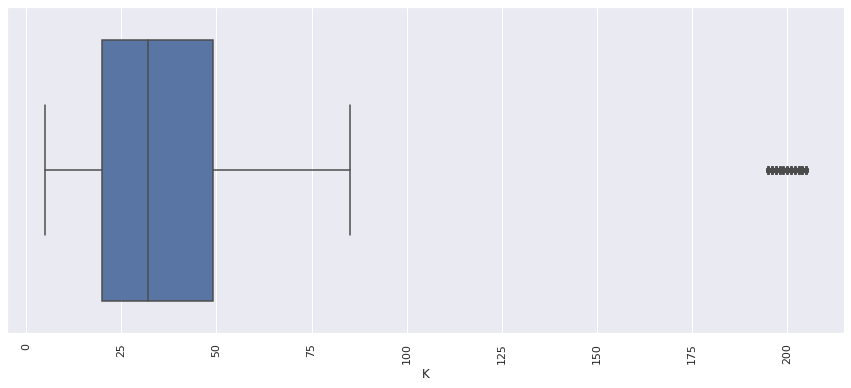

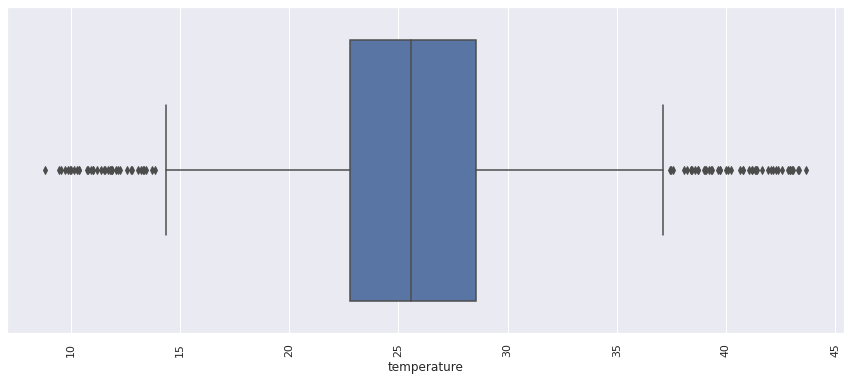

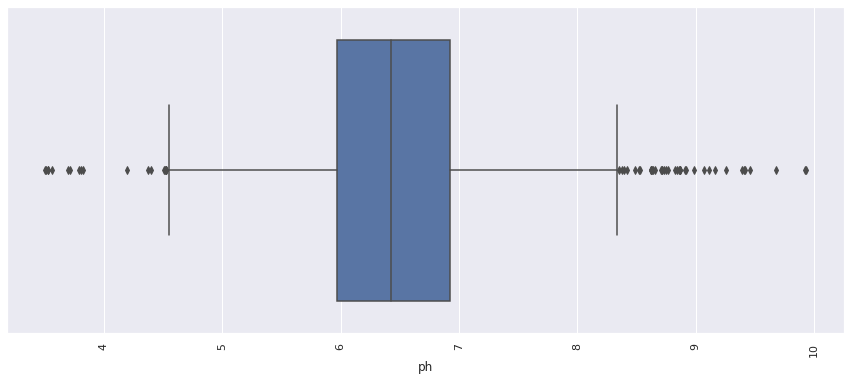

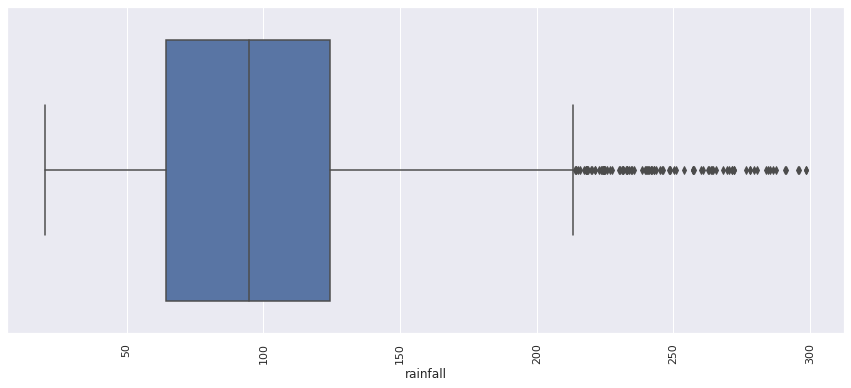

In [42]:
for col in df.columns:
  if col != 'label':
    plt.figure(figsize=(15,6))
    sns.boxplot(df[col])
    plt.xticks(rotation = 90)
    plt.show()

As seen above each of the features with the exception of N contains outliers, which would be handled before the implementation of the machine learning algorithm

In [43]:
# temperatue,K,P, rainfall,ph

In [44]:
#calculate z-score
z_score = (df - df.mean()) / df.std()

#identify outliers
outliers = z_score > 3

#remove outliers
df_without_outliers = df[~(z_score > 3).any(axis=1)]
df_without_outliers

N   P   K  temperature  humidity      ph  rainfall   label
0      90  42  43     20.87974  82.00274 6.50299 202.93554    rice
1      85  58  41     21.77046  80.31964 7.03810 226.65554    rice
2      60  55  44     23.00446  82.32076 7.84021 263.96425    rice
3      74  35  40     26.49110  80.15836 6.98040 242.86403    rice
4      78  42  42     20.13017  81.60487 7.62847 262.71734    rice
...   ...  ..  ..          ...       ...     ...       ...     ...
2195  107  34  32     26.77464  66.41327 6.78006 177.77451  coffee
2196   99  15  27     27.41711  56.63636 6.08692 127.92461  coffee
2197  118  33  30     24.13180  67.22512 6.36261 173.32284  coffee
2198  117  32  34     26.27242  52.12739 6.75879 127.17529  coffee
2199  104  18  30     23.60302  60.39647 6.77983 140.93704  coffee

[2045 rows x 8 columns]

In [45]:
# Using this dataset to generate sythetic data

# df_without_outliers.to_csv('df_without_outliers.csv')

#Percentage of Data lost after outliers were removed is Percentage loss = (2200 - 2045) / 2200 x 100 = 7.05% of total initial data of 2200

In [46]:
cf.unistats(df_without_outliers)

Count Missing Unique    Dtype Numeric     Mode      Mean      Min  \
temperature  2045       0   2045  float64    True  9.53559  25.60750  9.53559   
humidity     2045       0   2045  float64    True 14.25804  70.69116 14.25804   
ph           2045       0   2045  float64    True  3.50475   6.46532  3.50475   
rainfall     2045       0   2045  float64    True 20.21127 102.19290 20.21127   
N            2045       0    137    int64    True       22  51.76577        0   
P            2045       0    117    int64    True       60  49.68753        5   
K            2045       0     68    int64    True       17  41.15941        5   
label        2045       0     22   object   False   banana         -        -   

                 25%   Median       75%       Max      Std     Skew     Kurt  
temperature 22.99452 25.68960  28.52397  40.78882  4.68711 -0.02988  0.66681  
humidity    58.84881 79.47558  89.61850  99.98188 22.55730 -1.02812  0.14620  
ph           5.99812  6.43867   6.93254   8.76613  0.74166 -0.11283  0.92439  
rainfall    63.35299 94.78190 125.08491 267.97619 52.79596  0.79018  0.05765  
N           21.00000 38.00000  86.00000       140 37.37996  0.45646 -1.13111  
P           26.00000 49.00000  66.00000       145 29.22396  0.96660  1.39026  
K           20.00000 30.00000  47.00000       200 39.70534  3.05477  9.30995  
label              -        -         -         -        -        -        -

**After we removed the outliers,K appears to be greatly skewed to the right, and humidity remains left skewed. The kurtosis for K also incresed exponentially with lots of values clustered together having no spread.However there is a normalization of skewness and kurtosis to the acceptable range for all other variables.**

In [47]:
print("The shape of the dataset is: ", df_without_outliers.shape)

The shape of the dataset is:  (2045, 8)


In [48]:
n_duplicates = df_without_outliers.duplicated().sum()
print("There are", n_duplicates, "duplicated values in the dataset")

There are 0 duplicated values in the dataset


In [49]:
data_viz2 = pd.pivot_table(df_without_outliers,index=['label'],
aggfunc='mean')
df.hist(bins=25, figsize=(10, 10), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

In [50]:
import seaborn as sns
sns.pairplot(data_viz2);

In [51]:
df_without_outliers.cov()

N          P          K  temperature   humidity       ph  \
N           1397.26165 -196.30953  -77.00765      3.60397  180.72445  3.19716   
P           -196.30953  854.03979  716.68389    -14.22236 -154.00558 -1.90707   
K            -77.00765  716.68389 1576.51371    -24.95664  115.34551 -3.22681   
temperature    3.60397  -14.22236  -24.95664     21.96901   23.94047 -0.18324   
humidity     180.72445 -154.00558  115.34551     23.94047  508.83180  0.73252   
ph             3.19716   -1.90707   -3.22681     -0.18324    0.73252  0.55006   
rainfall      41.93422  -69.44374  -55.67397    -13.34051   89.37369 -3.81584   

              rainfall  
N             41.93422  
P            -69.44374  
K            -55.67397  
temperature  -13.34051  
humidity      89.37369  
ph            -3.81584  
rainfall    2787.41348

In [52]:
df_without_outliers.corr()

N        P        K  temperature  humidity       ph  \
N            1.00000 -0.17971 -0.05189      0.02057   0.21433  0.11532   
P           -0.17971  1.00000  0.61765     -0.10383  -0.23362 -0.08799   
K           -0.05189  0.61765  1.00000     -0.13410   0.12878 -0.10958   
temperature  0.02057 -0.10383 -0.13410      1.00000   0.22643 -0.05271   
humidity     0.21433 -0.23362  0.12878      0.22643   1.00000  0.04379   
ph           0.11532 -0.08799 -0.10958     -0.05271   0.04379  1.00000   
rainfall     0.02125 -0.04501 -0.02656     -0.05391   0.07505 -0.09745   

             rainfall  
N             0.02125  
P            -0.04501  
K            -0.02656  
temperature  -0.05391  
humidity      0.07505  
ph           -0.09745  
rainfall      1.00000

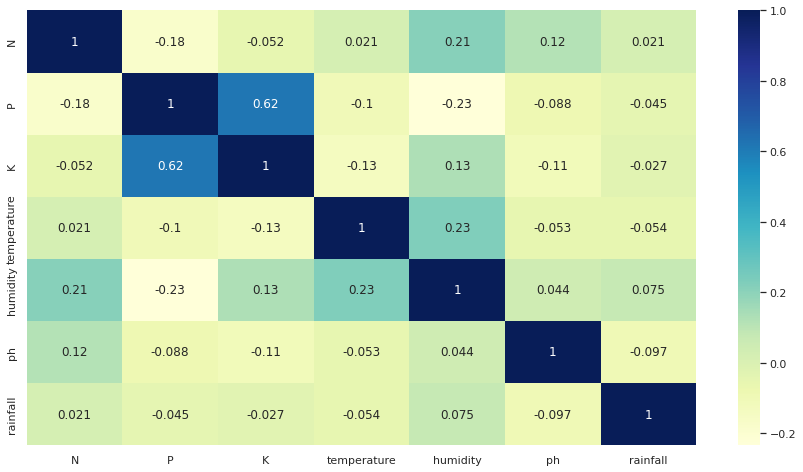

In [53]:
plt.figure(figsize=(15, 8))
dp = sns.heatmap(df_without_outliers.corr(), cmap="YlGnBu", annot=True)
plt.show()

The potassium and Phosphorus columns appears to have a slight postive correlation within the dataset which is lower than that seen when the dataset contained outliers.

In [54]:
df_without_outliers['K'].corr(df_without_outliers['P'])

0.6176461110474327

In [55]:
# Normality Test
df_wtout_out = df_without_outliers.drop('label', axis=1)
if pd.api.types.is_numeric_dtype(df_wtout_out):
  r, p = stats.shapiro(df_wtout_out)
print('Statistics=%.3f, p=%.3f' % (r, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian')
else:
    print('Sample does not look Gaussian')   

Statistics=-0.109, p=0.000
Sample does not look Gaussian


In [56]:
from scipy.stats import boxcox

opt_lambda = boxcox(df_without_outliers['K'])[1]
transformed_data = boxcox(df_without_outliers['K'], lmbda=opt_lambda)
transformed_data

array([2.32246929, 2.30579676, 2.33043747, ..., 2.19074158, 2.23805751,
       2.19074158])

In [57]:
df_new_K = pd.DataFrame(transformed_data)
df_new_K.skew()

0   -0.04739
dtype: float64

In [58]:
df_without_outliers['K_new'] = transformed_data

In [59]:
# Normality Test
df_wtout_out = df_without_outliers.drop(['label', 'K'], axis=1)
if pd.api.types.is_numeric_dtype(df_wtout_out):
  r, p = stats.shapiro(df_wtout_out)
print('Statistics=%.3f, p=%.3f' % (r, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian')
else:
    print('Sample does not look Gaussian') 

Statistics=-0.109, p=0.000
Sample does not look Gaussian


In [60]:
from sklearn.preprocessing import StandardScaler

X = df_without_outliers.drop(['label', 'K'], axis=1)
y = df_without_outliers['label']
scaled = StandardScaler()
x_scaled = scaled.fit_transform(X)
x_scaled

array([[ 1.02310378e+00, -2.63120092e-01, -1.00891773e+00, ...,
         5.07989822e-02,  1.90861715e+00,  5.47521216e-01],
       [ 8.89309559e-01,  2.84509793e-01, -8.18835653e-01, ...,
         7.72479994e-01,  2.35800386e+00,  4.78535100e-01],
       [ 2.20338468e-01,  1.81829189e-01, -5.55496628e-01, ...,
         1.85425190e+00,  3.06483512e+00,  5.80491260e-01],
       ...,
       [ 1.77235140e+00, -5.71161903e-01, -3.14919126e-01, ...,
        -1.38521964e-01,  1.34759051e+00,  2.47007044e-03],
       [ 1.74559255e+00, -6.05388771e-01,  1.41896382e-01, ...,
         3.95795102e-01,  4.73303307e-01,  1.98249691e-01],
       [ 1.39772759e+00, -1.08456492e+00, -4.27762734e-01, ...,
         4.24170914e-01,  7.34026182e-01,  2.47007044e-03]])

In [61]:
df_test_analysis = pd.DataFrame(x_scaled, columns=X.columns)
df_test_analysis

N        P  temperature  humidity       ph  rainfall    K_new
0    1.02310 -0.26312     -1.00892   0.50158  0.05080   1.90862  0.54752
1    0.88931  0.28451     -0.81884   0.42695  0.77248   2.35800  0.47854
2    0.22034  0.18183     -0.55550   0.51568  1.85425   3.06484  0.58049
3    0.59496 -0.50271      0.18856   0.41980  0.69467   2.66508  0.44240
4    0.70200 -0.26312     -1.16888   0.48394  1.56870   3.04121  0.51355
...      ...      ...          ...       ...      ...       ...      ...
2040 1.47800 -0.53694      0.24907  -0.18969  0.42448   1.43193  0.10428
2041 1.26393 -1.18725      0.38618  -0.62322 -0.51033   0.48750 -0.16775
2042 1.77235 -0.57116     -0.31492  -0.15369 -0.13852   1.34759  0.00247
2043 1.74559 -0.60539      0.14190  -0.82316  0.39580   0.47330  0.19825
2044 1.39773 -1.08456     -0.42776  -0.45649  0.42417   0.73403  0.00247

[2045 rows x 7 columns]

In [62]:
cf.unistats(df_test_analysis)

Count Missing Unique    Dtype Numeric     Mode     Mean      Min  \
temperature  2045       0   2045  float64    True -3.42980  0.00000 -3.42980   
humidity     2045       0   2045  float64    True -2.50238 -0.00000 -2.50238   
ph           2045       0   2045  float64    True -3.99279  0.00000 -3.99279   
rainfall     2045       0   2045  float64    True -1.55318  0.00000 -1.55318   
N            2045       0    137  float64    True -0.79650  0.00000 -1.38519   
P            2045       0    117  float64    True  0.35296 -0.00000 -1.52951   
K_new        2045       0     68  float64    True -0.97778 -0.00000 -3.70458   

                 25%   Median     75%     Max     Std     Skew     Kurt  
temperature -0.55762  0.01752 0.62238 3.23974 1.00024 -0.02988  0.66681  
humidity    -0.52512  0.38952 0.83928 1.29882 1.00024 -1.02812  0.14620  
ph          -0.63008 -0.03594 0.63012 3.10300 1.00024 -0.11283  0.92439  
rainfall    -0.73584 -0.14041 0.43370 3.14084 1.00024  0.79018  0.05765  
N           -0.82326 -0.36836 0.91607 2.36105 1.00024  0.45646 -1.13111  
P           -0.81075 -0.02353 0.55832 3.26225 1.00024  0.96660  1.39026  
K_new       -0.68116  0.00247 0.67391 2.34358 1.00024 -0.04739  0.97106

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X_train,X_test,y_train,y_test = train_test_split(df_test_analysis, y, test_size=0.33, random_state=20)

In [64]:

# from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9940740740740741

In [65]:
y_pred = rf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

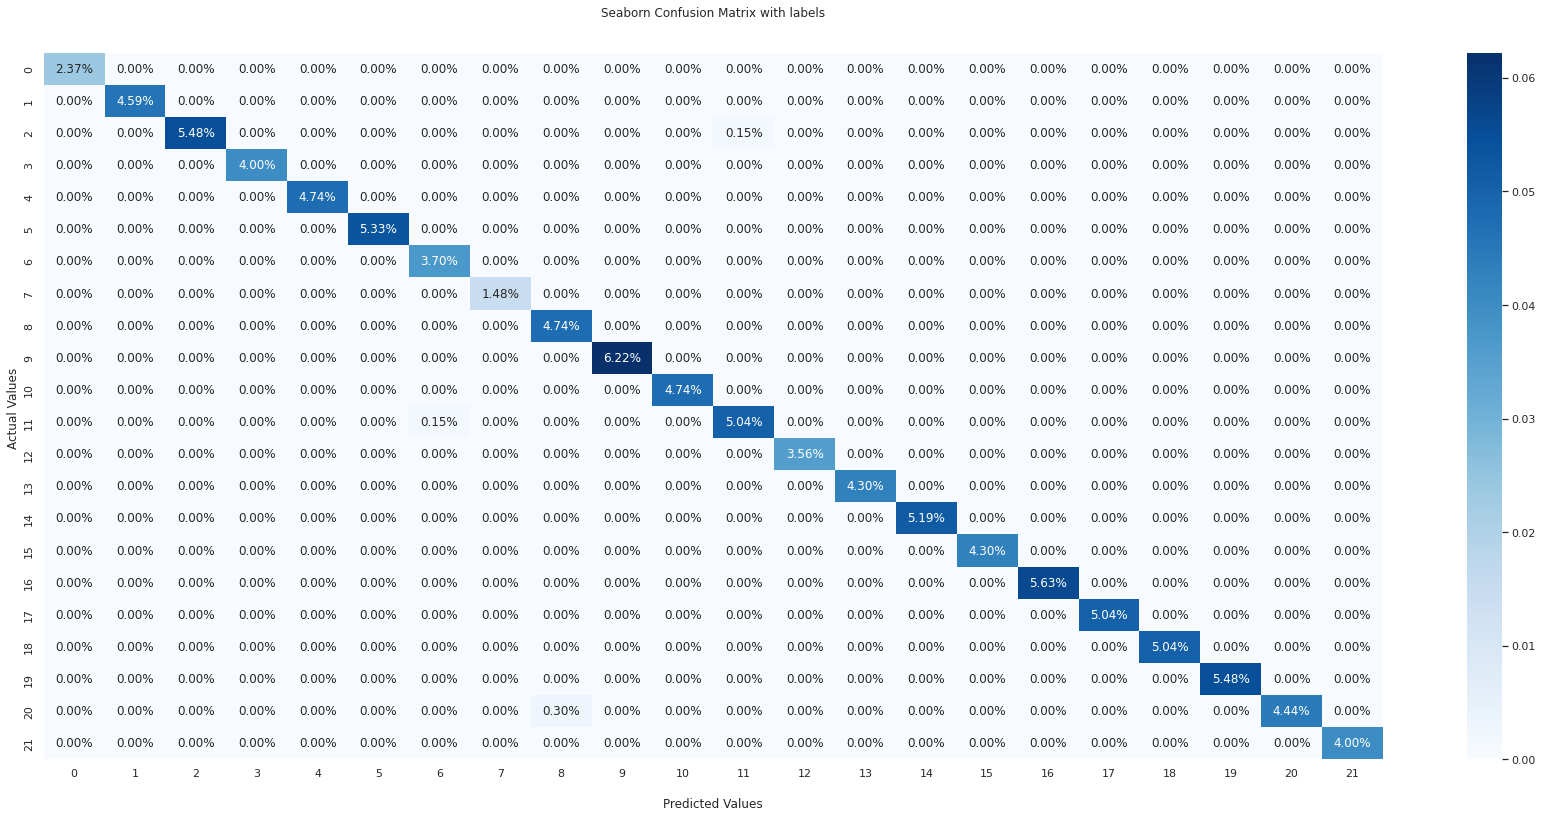

In [66]:
plt.figure(figsize=(30, 13))
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
fmt='.2%', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# ax.xaxis.set_ticklabels()
# ax.yaxis.set_ticklabels()

plt.show()

In [67]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

y_pred = dt.predict(X_test)
dt.score(X_test, y_test)

0.9837037037037037

In [68]:
from sklearn.metrics import confusion_matrix

y_pred = dt.predict(X_test)
cf_matrix_d = confusion_matrix(y_test, y_pred)

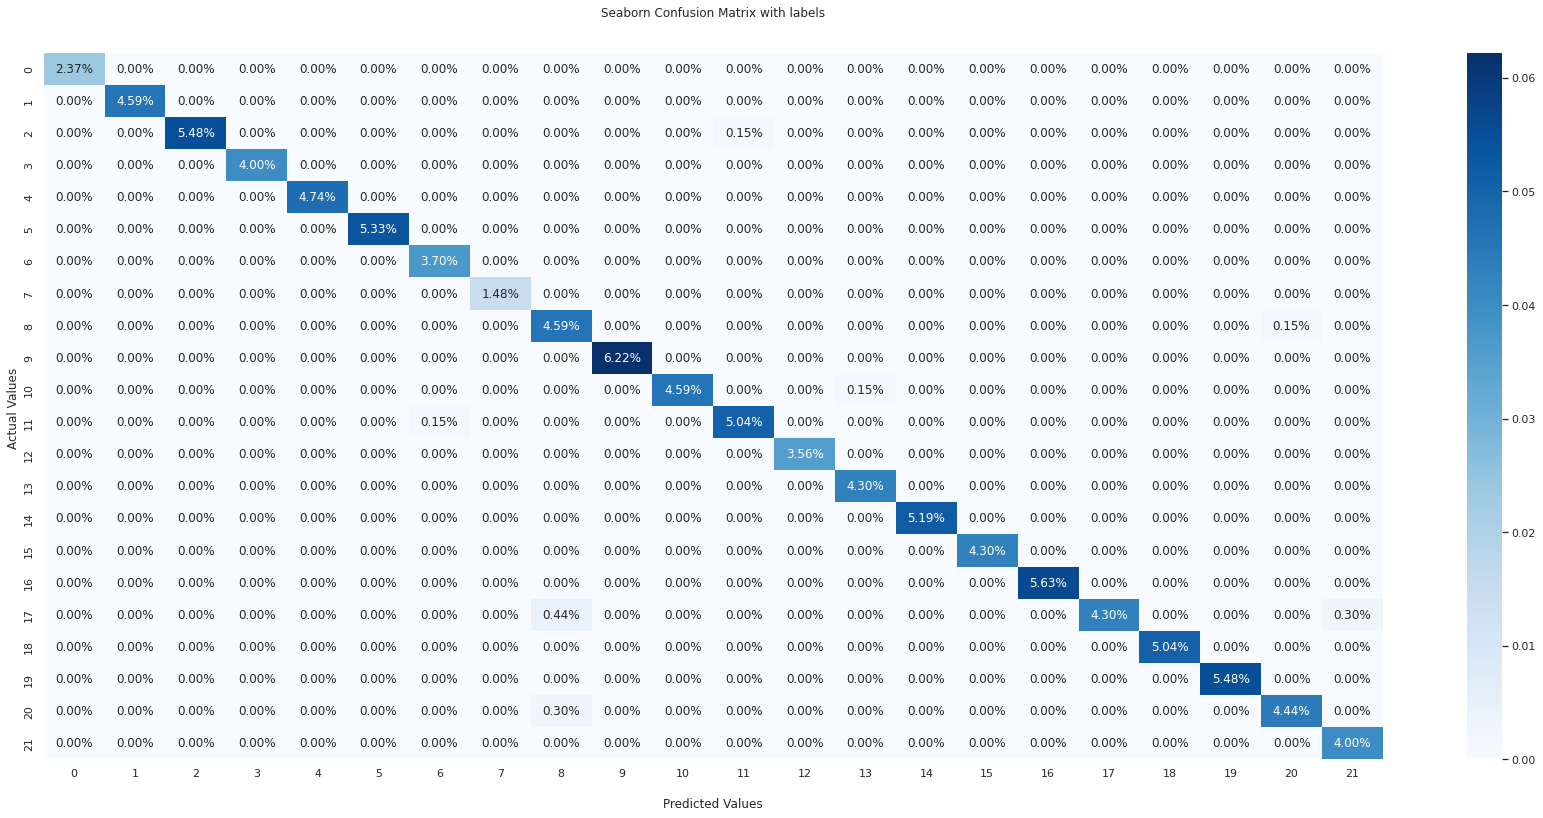

In [69]:
plt.figure(figsize=(30, 13))
ax = sns.heatmap(cf_matrix_d/np.sum(cf_matrix_d), annot=True,
fmt='.2%', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

In [70]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.997037037037037

In [71]:
y_pred = nb.predict(X_test)
cf_matrix_n = confusion_matrix(y_test, y_pred)

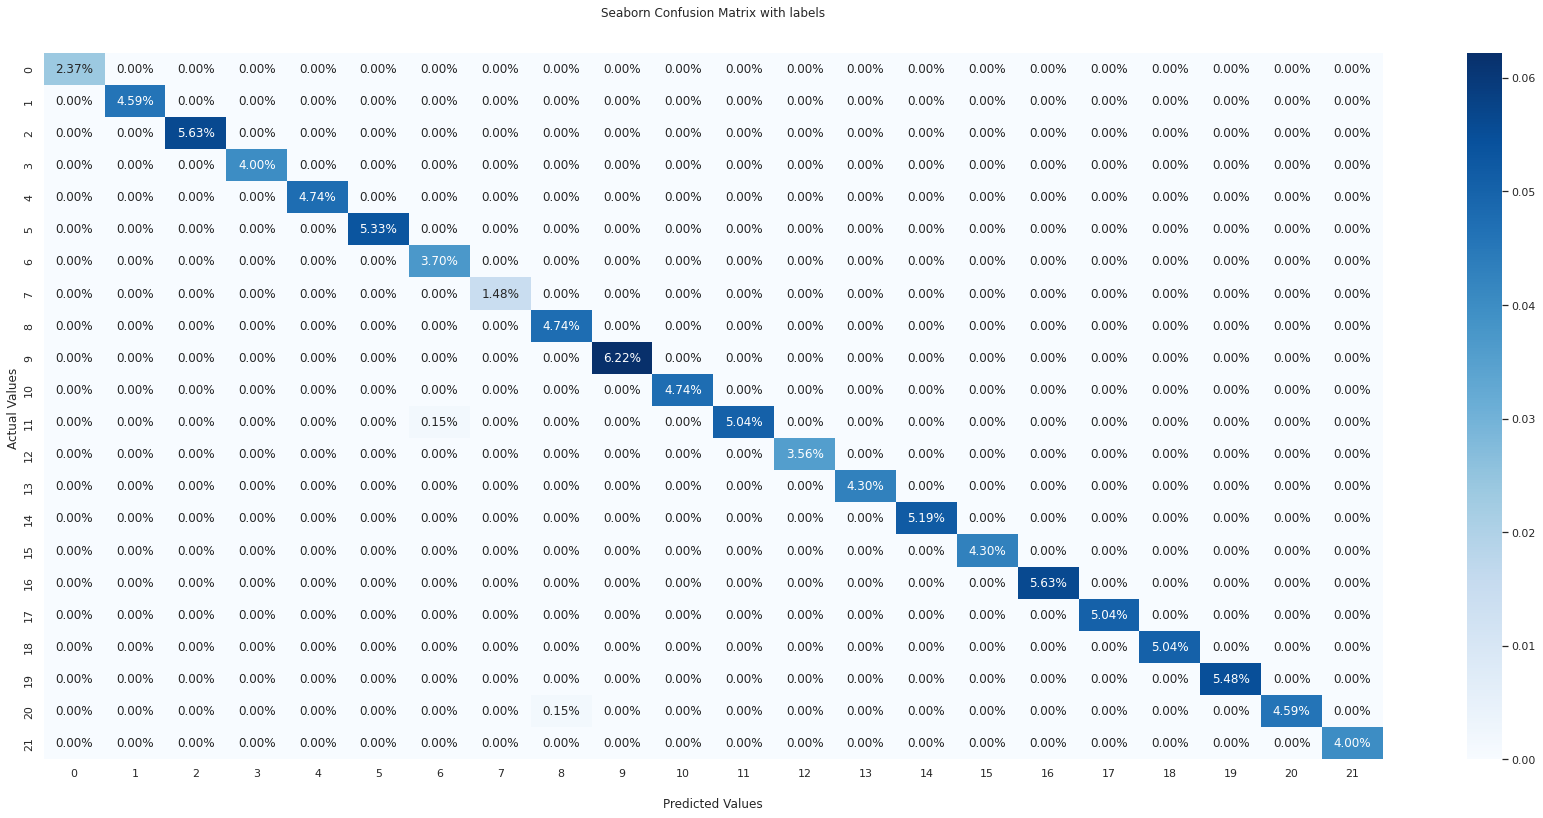

In [72]:
plt.figure(figsize=(30, 13))
ax = sns.heatmap(cf_matrix_n/np.sum(cf_matrix_n), annot=True,
fmt='.2%', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

In [73]:
from sklearn.preprocessing import LabelEncoder
#create label encoder object
le = LabelEncoder()

#convert the categorical columns into numeric
df_without_outliers['label'] = le.fit_transform(df_without_outliers['label'])

y_xgb = df_without_outliers['label']
#view the data
df_without_outliers.head()
y_xgb

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2045, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


X_train,X_test,y_train_xgb,y_test_xgb = train_test_split(df_test_analysis, y_xgb, test_size=0.33, random_state=20)

#Fit the model
xgb = XGBClassifier()
xgb.fit(X_train, y_train_xgb)

#Make predictions
y_pred = xgb.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test_xgb, y_pred)

#Print the accuracy
print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 98.96%


In [75]:
y_pred.shape, y_test_xgb.shape

((675,), (675,))

In [76]:
y_pred = xgb.predict(X_test)
cf_matrix_x = confusion_matrix(y_test_xgb, y_pred)

In [77]:
plt.figure(figsize=(30, 13))
ax = sns.heatmap(cf_matrix_x/np.sum(cf_matrix_x), annot=True,
fmt='.2%', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

0.9851851851851852

In [79]:
y_pred = gb.predict(X_test)
cf_matrix_g = confusion_matrix(y_test, y_pred)

In [80]:
plt.figure(figsize=(30, 13))
ax = sns.heatmap(cf_matrix_g/np.sum(cf_matrix_g), annot=True,
fmt='.2%', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9718518518518519

In [82]:
y_pred = knn.predict(X_test)
cf_matrix_k = confusion_matrix(y_test, y_pred)

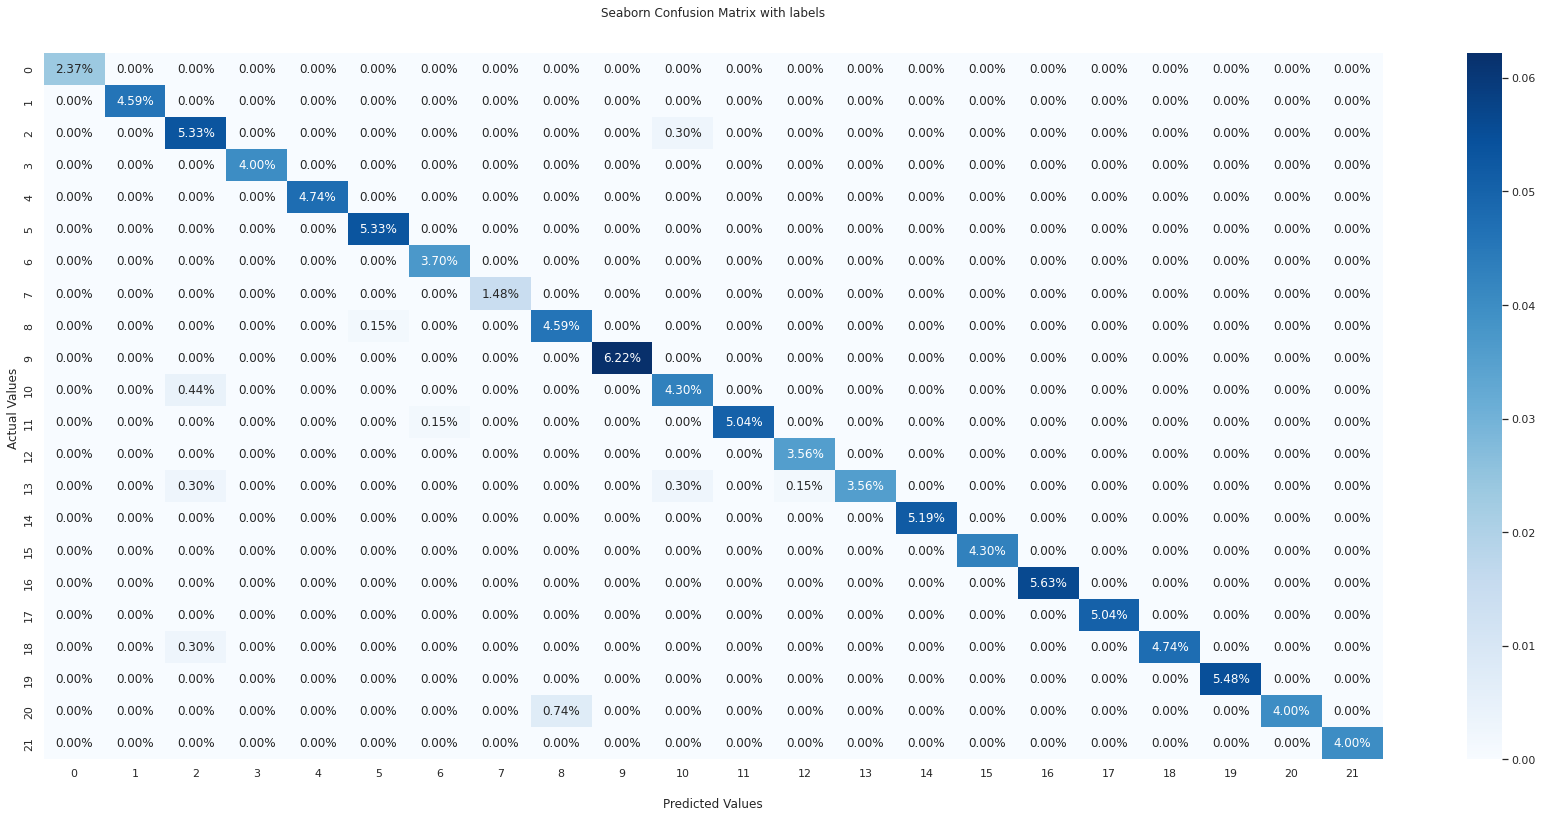

In [83]:
plt.figure(figsize=(30, 13))
ax = sns.heatmap(cf_matrix_k/np.sum(cf_matrix_k), annot=True,
fmt='.2%', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

In [84]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.965925925925926

In [85]:
y_pred = lr.predict(X_test)
cf_matrix_l = confusion_matrix(y_test, y_pred)

In [86]:
plt.figure(figsize=(30, 13))
ax = sns.heatmap(cf_matrix_l/np.sum(cf_matrix_l), annot=True,
fmt='.2%', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

In [87]:
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

In [88]:
y_pred = svm.predict(X_test)
cf_matrix_s = confusion_matrix(y_test, y_pred)

In [89]:
plt.figure(figsize=(30, 13))
ax = sns.heatmap(cf_matrix_s/np.sum(cf_matrix_s), annot=True,
fmt='.2%', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

# **Hyperparameter Tunning**

##Random Forest

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Create the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

#Instantiate the RandomForestClassifier
rf = RandomForestClassifier()

#Setup the GridSearchCV object
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

#Fit to the data
grid_search.fit(X_train, y_train)

#Print the best parameters and best score
print('Best Parameters: ', grid_search.best_params_)
print('Best Score: ', grid_search.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best Score:  0.9926980562273665


##Decision Tree

In [91]:
dt = DecisionTreeClassifier()

#Define the hyperparameters to tune 
params = {'max_depth':[20,35,45,60], 'min_samples_split':[2,3,4,5], 'criterion':['gini','entropy']}

grid_search = GridSearchCV(estimator=dt, param_grid=params, cv=10, n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)

#Print the best parameters
grid_search.best_score_, grid_search.best_params_

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END ..criterion=gini, max_depth=20, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=20, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=20, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=20, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=20, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=20, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=20, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=20, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=20, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=20, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=20, min_samples_split=3; total time=   0.0s
[CV] END ..criterion=gini, max_depth=20, min_s

(0.9875912408759124,
 {'criterion': 'gini', 'max_depth': 35, 'min_samples_split': 3})

##Naive Bayes

In [92]:
# np.logspace(0,-9, num=10)

In [93]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)

In [94]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nb, param_grid=params_NB, cv=cv_method,
verbose=1, scoring='accuracy')

data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(data_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [95]:
gs_NB.best_params_,gs_NB.best_score_

({'var_smoothing': 0.0006579332246575676}, 0.9930864197530865)

##Gradient Boosting Machine

In [96]:
#Execution time 20mins 12s
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

#define range of hyperparameters to tune
param_grid = {
    'learning_rate': np.arange(000.1,000.5,0.009),
    'n_estimators': np.arange(50,500,50),
    'max_depth': np.arange(1,10,1),
    'min_samples_split': np.arange(2,10,1),
    'min_samples_leaf': np.arange(1,10,1)
    }



#set up randomized search cv
rscv = RandomizedSearchCV(gb, param_grid, scoring='accuracy', n_iter=25, n_jobs=-1, cv=5, random_state=42)

#train model with randomized search cv
rscv.fit(X_train, y_train)

#find best parameters
best_params = rscv.best_params_

#predict on test set
y_pred = rscv.predict(X_test)
print(rscv.best_params_,rscv.best_score_)

{'n_estimators': 250, 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_depth': 4, 'learning_rate': 0.18099999999999994} 0.9875912408759124


##Logistic Regression

In [97]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

#instantiate the grid search model
grid_search = GridSearchCV(estimator = lr, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

#fit the grid search to the data
grid_search.fit(X_train,y_train)

#view the best hyperparameters
print('Best Penalty:', grid_search.best_estimator_.get_params()['penalty'])
print('Best C:', grid_search.best_estimator_.get_params()['C'])
print('Best Score :', grid_search.best_score_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best Penalty: l2
Best C: 100
Best Score : 0.9759124087591239


##K-Nearest Neigbour

In [98]:
k_range = list(range(1, 31))
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
grid.fit(X, y)
# view the complete results
grid.cv_results_
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.9515877570540411
{'n_neighbors': 1}



##Support Vector Machine

In [99]:
# sample code for support vector machine hyperparameter tuning

# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# define parameter values 
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

# create the grid 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fit the grid with data 
grid.fit(X_train,y_train)

# view the results 
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.810 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.792 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.796 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.781 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.788 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.865 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.858 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.850 total time=   0.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.161 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

##XGBoost

In [100]:
# Create Parameter Grid
param_grid = {
    "learning_rate": [0.1, 0.01],
    "max_depth": [3, 4],
    "gamma": [0, 0.5],
    "n_estimators": [100, 200]
}

# Create Grid Search CV
grid_search_cv = GridSearchCV(xgb, param_grid, scoring="accuracy", n_jobs=-1, cv=5)

# Fit model
grid_search_cv.fit(X_train, y_train_xgb)

# Print best parameters
print("Best Score: ", grid_search_cv.best_score_)
print("Best Parameters: ", grid_search_cv.best_params_)

Best Score:  0.981021897810219
Best Parameters:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [101]:
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [102]:
from sklearn.metrics import roc_auc_score
# generate predictions from each model
lr_pred_prob = lr.predict_proba(X_test)
knn_pred_prob = knn.predict_proba(X_test)
rf_pred_prob = rf.predict_proba(X_test)
svm_pred_prob = svm.predict_proba(X_test)
dt_pred_prob = dt.predict_proba(X_test)
xgb_pred_prob = xgb.predict_proba(X_test)
nb_pred_prob = nb.predict_proba(X_test)
gb_pred_prob = gb.predict_proba(X_test)



# calculate the roc auc score for each model
lr_auc = roc_auc_score(y_test, lr_pred_prob, multi_class='ovr')
knn_auc = roc_auc_score(y_test, knn_pred_prob, multi_class='ovr')
rf_auc = roc_auc_score(y_test, rf_pred_prob, multi_class='ovr')
svm_auc = roc_auc_score(y_test, svm_pred_prob, multi_class='ovr')
dt_auc = roc_auc_score(y_test, dt_pred_prob, multi_class='ovr')
nb_auc = roc_auc_score(y_test, nb_pred_prob, multi_class='ovr')
gb_auc = roc_auc_score(y_test, gb_pred_prob, multi_class='ovr')
xgb_auc = roc_auc_score(y_test, xgb_pred_prob, multi_class='ovr')

# print the results
print('Logistic Regression:', lr_auc)
print('K-Nearest Neighbors:', knn_auc)
print('Random Forest:', rf_auc)
print('Support Vector Machine:', svm_auc)
print('Decision Tree:', dt_auc)
print('Naive Bayes:', nb_auc)
print('Gradient Boosting Machine:', gb_auc)
print('XGBoost:', xgb_auc)

Logistic Regression: 0.9996155141845162
K-Nearest Neighbors: 0.9981093685571243
Random Forest: 0.9999913434640788
Support Vector Machine: 0.9999334023132154
Decision Tree: 0.9942929148585328
Naive Bayes: 0.9999955817899053
Gradient Boosting Machine: 0.9999451005510042
XGBoost: 0.9999799008467432


In [103]:
# from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import roc_auc_score,roc_curve  
from sklearn.multiclass import OneVsRestClassifier

X_train,X_test,y_train_xgb,y_test_xgb = train_test_split(df_test_analysis, y_xgb, test_size=0.33, random_state=20) 

clf = OneVsRestClassifier(knn) 
clf.fit(X_train, y_train_xgb) 
 
y_pred = clf.predict_proba(X_test) 
y_pred_proba = y_pred[:,1]
#computing the roc auc score 
roc_auc_score(y_test_xgb, y_pred, multi_class="ovr") 

#computing the roc curve 
fpr, tpr, thresholds = roc_curve(y_test_xgb, y_pred_proba, pos_label=1) 

#plotting the roc curve 
plt.plot(fpr, tpr) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.show()

In [104]:
# Naive Bayes

nb_fp = cf_matrix_n.sum(axis=0) - np.diag(cf_matrix_n)  
nb_fn = cf_matrix_n.sum(axis=1) - np.diag(cf_matrix_n)
nb_tp = np.diag(cf_matrix_n)
nb_tn = cf_matrix_n.sum() - (nb_fp + nb_fn + nb_tp)

nb_fp = nb_fp.astype(float)
nb_fn = nb_fn.astype(float)
nb_tp = nb_tp.astype(float)
nb_tn = nb_tn.astype(float)

#true positive rate
nb_tpr = nb_tp/(nb_tp+nb_fn)
# Specificity or true negative rate
nb_tnr = nb_tn/(nb_tn+nb_fp) 
nb_fpr = nb_fp/(nb_fp+nb_tn)

#Random Forest

rf_fp = cf_matrix.sum(axis=0) - np.diag(cf_matrix)  
rf_fn = cf_matrix.sum(axis=1) - np.diag(cf_matrix)
rf_tp = np.diag(cf_matrix)
rf_tn = cf_matrix.sum() - (rf_fp + rf_fn + rf_tp)

rf_fp = rf_fp.astype(float)
rf_fn = rf_fn.astype(float)
rf_tp = rf_tp.astype(float)
rf_tn = rf_tn.astype(float)

# true positive rate
rf_tpr = rf_tp/(rf_tp+rf_fn)
# Specificity or true negative rate
rf_tnr = rf_tn/(rf_tn+rf_fp) 
rf_fpr = rf_fp/(rf_fp+rf_tn)


# Logistic Regression

lr_fp = cf_matrix_l.sum(axis=0) - np.diag(cf_matrix_l)  
lr_fn = cf_matrix_l.sum(axis=1) - np.diag(cf_matrix_l)
lr_tp = np.diag(cf_matrix_l)
lr_tn = cf_matrix_l.sum() - (lr_fp + lr_fn + lr_tp)

lr_fp = lr_fp.astype(float)
lr_fn = lr_fn.astype(float)
lr_tp = lr_tp.astype(float)
lr_tn = lr_tn.astype(float)

#true positive rate
lr_tpr = lr_tp/(lr_tp+lr_fn)
# Specificity or true negative rate
lr_tnr = lr_tn/(lr_tn+lr_fp) 
lr_fpr = lr_fp/(lr_fp+lr_tn)


# Decision Tree

dt_fp = cf_matrix_d.sum(axis=0) - np.diag(cf_matrix_d)  
dt_fn = cf_matrix_d.sum(axis=1) - np.diag(cf_matrix_d)
dt_tp = np.diag(cf_matrix_d)
dt_tn = cf_matrix_d.sum() - (dt_fp + dt_fn + dt_tp)

dt_fp = dt_fp.astype(float)
dt_fn = dt_fn.astype(float)
dt_tp = dt_tp.astype(float)
dt_tn = dt_tn.astype(float)

# true positive rate
dt_tpr = dt_tp/(dt_tp+dt_fn)
# Specificity or true negative rate
dt_tnr = dt_tn/(dt_tn+dt_fp) 
dt_fpr = dt_fp/(dt_fp+dt_tn)


# Gradient Boosting Machine

gbm_fp = cf_matrix_g.sum(axis=0) - np.diag(cf_matrix_g)  
gbm_fn = cf_matrix_g.sum(axis=1) - np.diag(cf_matrix_g)
gbm_tp = np.diag(cf_matrix_g)
gbm_tn = cf_matrix_g.sum() - (dt_fp + dt_fn + dt_tp)

gbm_fp = gbm_fp.astype(float)
gbm_fn = gbm_fn.astype(float)
gbm_tp = gbm_tp.astype(float)
gbm_tn = gbm_tn.astype(float)

# true positive rate
gbm_tpr = gbm_tp/(gbm_tp+gbm_fn)
# Specificity or true negative rate
gbm_tnr = gbm_tn/(gbm_tn+gbm_fp) 
gbm_fpr = gbm_fp/(gbm_fp+gbm_tn)



# Support Vector Machine

svm_fp = cf_matrix_s.sum(axis=0) - np.diag(cf_matrix_s)  
svm_fn = cf_matrix_s.sum(axis=1) - np.diag(cf_matrix_s)
svm_tp = np.diag(cf_matrix_s)
svm_tn = cf_matrix_s.sum() - (svm_fp + svm_fn + svm_tp)

svm_fp = svm_fp.astype(float)
svm_fn = svm_fn.astype(float)
svm_tp = svm_tp.astype(float)
svm_tn = svm_tn.astype(float)

# true positive rate
svm_tpr = svm_tp/(svm_tp+svm_fn)
# Specificity or true negative rate
svm_tnr = svm_tn/(svm_tn+svm_fp) 
svm_fpr = svm_fp/(svm_fp+svm_tn)

# K-Nearest Neighbor

knn_fp = cf_matrix_k.sum(axis=0) - np.diag(cf_matrix_k)  
knn_fn = cf_matrix_k.sum(axis=1) - np.diag(cf_matrix_k)
knn_tp = np.diag(cf_matrix_k)
knn_tn = cf_matrix_k.sum() - (knn_fp + knn_fn + knn_tp)

knn_fp = knn_fp.astype(float)
knn_fn = knn_fn.astype(float)
knn_tp = knn_tp.astype(float)
knn_tn = knn_tn.astype(float)

# true positive rate
knn_tpr = knn_tp/(knn_tp+knn_fn)
# Specificity or true negative rate
knn_tnr = knn_tn/(knn_tn+knn_fp) 
knn_fpr = knn_fp/(knn_fp+knn_tn)

# XGBoost

xgb_fp = cf_matrix_x.sum(axis=0) - np.diag(cf_matrix_x)  
xgb_fn = cf_matrix_x.sum(axis=1) - np.diag(cf_matrix_x)
xgb_tp = np.diag(cf_matrix_x)
xgb_tn = cf_matrix_x.sum() - (xgb_fp + xgb_fn + xgb_tp)

xgb_fp = xgb_fp.astype(float)
xgb_fn = xgb_fn.astype(float)
xgb_tp = xgb_tp.astype(float)
xgb_tn = xgb_tn.astype(float)

# true positive rate
xgb_tpr = xgb_tp/(xgb_tp+xgb_fn)
# Specificity or true negative rate
xgb_tnr = xgb_tn/(xgb_tn+xgb_fp) 
xgb_fpr = xgb_fp/(xgb_fp+xgb_tn)

In [105]:
# score_xgb = (xgb_tp + xgb_tn) / (xgb_tp + xgb_tn + xgb_fp + xgb_fn)
# pd.DataFrame(score_xgb)

In [106]:
plt.figure(figsize=(15, 10))
plt.plot(nb_fpr, nb_tpr, linestyle='--', label='Naive Bayes (AUROC = %0.5f)' %nb_auc)
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='Random Forest (AUROC = %0.5f)' %rf_auc)
plt.plot(dt_fpr, dt_tpr, linestyle='--', label='Descision Tree (AUROC = %0.5f)' %dt_auc)
plt.plot(gbm_fpr, gbm_tpr, linestyle='--', label='Gradient Boosting (AUROC = %0.5f)' %gb_auc)
plt.plot(knn_fpr, knn_tpr, linestyle='--', label='K-Nearest Neighbors (AUROC = %0.5f)' %knn_auc)
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='Logistic Regression (AUROC = %0.5f)' %lr_auc)
plt.plot(svm_fpr, svm_tpr, linestyle='--', label='Support Vector Machine (AUROC = %0.5f)' %svm_auc)
plt.plot(xgb_fpr, xgb_tpr, linestyle='--', label='XGBoost (AUROC = %0.5f)' %xgb_auc)

plt.title("ROC Plot")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [107]:
from sklearn.metrics import classification_report

y_rf = rf.predict(X_test)
y_nb = nb.predict(X_test)
y_lr = lr.predict(X_test)
y_dt = dt.predict(X_test)
y_svm = svm.predict(X_test)
y_knn = knn.predict(X_test)
y_xgb = xgb.predict(X_test)
y_gbm = gb.predict(X_test)


# Generate classification reports for each model
print('SVM Classification Report')
print(classification_report(y_test, y_svm))

print('Logistic Regression Classification Report')
print(classification_report(y_test, y_lr))

print('Random Forest Classification Report')
print(classification_report(y_test, y_rf))

print('KNN Classification Report')
print(classification_report(y_test, y_knn))

print('XGBoost Classification Report')
print(classification_report(y_test_xgb, y_xgb))

print('GBM Classification Report')
print(classification_report(y_test, y_gbm))

print('Naive Bayes Classification Report')
print(classification_report(y_test, y_nb))

print('Decision Tree Classification Report')
print(classification_report(y_test, y_dt))

SVM Classification Report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        16
      banana       1.00      1.00      1.00        31
   blackgram       0.95      0.95      0.95        38
    chickpea       1.00      1.00      1.00        27
     coconut       1.00      1.00      1.00        32
      coffee       1.00      1.00      1.00        36
      cotton       0.96      1.00      0.98        25
      grapes       1.00      1.00      1.00        10
        jute       0.80      1.00      0.89        32
 kidneybeans       1.00      1.00      1.00        42
      lentil       0.89      0.97      0.93        32
       maize       1.00      0.97      0.99        35
       mango       1.00      1.00      1.00        24
   mothbeans       1.00      0.93      0.96        29
    mungbean       1.00      1.00      1.00        35
   muskmelon       1.00      1.00      1.00        29
      orange       1.00      1.00      1.00        38
 

In [108]:
!pip install shap --quiet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 15.1 MB/s eta 0:00:00


In [109]:
import shap
shap.initjs()

In [110]:
# Execution Time : 19 mins
explainer = shap.KernelExplainer(nb.predict_proba, X_train)
shap_values = explainer.shap_values(X_test, nsamples=100)

  0%|          | 0/675 [00:00<?, ?it/s]

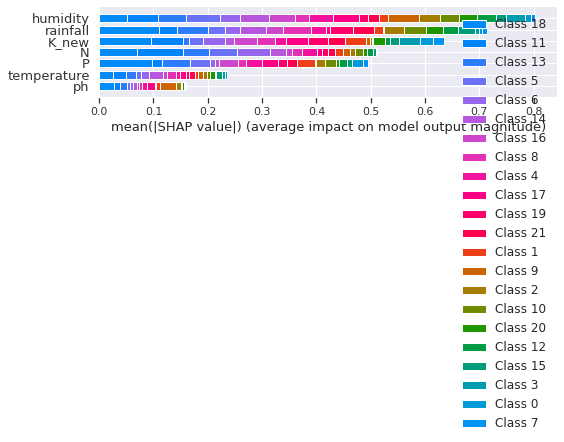

In [111]:
plt.figure(figsize=(13, 30))
shap.summary_plot(shap_values, X_test, show=True)

In [112]:
#save and test with sythetic data

In [113]:
import pickle

with open('scaled.pkl', 'wb') as f:
  pickle.dump(scaled, f)

In [114]:
import pickle

pickle.dump(nb, open('nb_model.pkl', 'wb'))
model = pickle.load(open('nb_model.pkl', 'rb'))
y_pred = nb.predict(X_test)
print(y_pred)

['rice' 'pomegranate' 'pomegranate' 'chickpea' 'coconut' 'mothbeans'
 'blackgram' 'maize' 'watermelon' 'mungbean' 'pomegranate' 'jute'
 'blackgram' 'jute' 'cotton' 'lentil' 'coconut' 'mothbeans' 'cotton'
 'apple' 'papaya' 'pomegranate' 'kidneybeans' 'banana' 'jute' 'banana'
 'jute' 'papaya' 'kidneybeans' 'watermelon' 'kidneybeans' 'mothbeans'
 'muskmelon' 'pigeonpeas' 'orange' 'papaya' 'pomegranate' 'kidneybeans'
 'mothbeans' 'lentil' 'orange' 'maize' 'lentil' 'chickpea' 'lentil'
 'coffee' 'pigeonpeas' 'kidneybeans' 'watermelon' 'papaya' 'muskmelon'
 'mungbean' 'mango' 'coconut' 'orange' 'orange' 'kidneybeans' 'mothbeans'
 'maize' 'lentil' 'maize' 'kidneybeans' 'watermelon' 'maize' 'rice'
 'mungbean' 'maize' 'orange' 'muskmelon' 'cotton' 'chickpea' 'chickpea'
 'lentil' 'grapes' 'blackgram' 'kidneybeans' 'papaya' 'coffee' 'mungbean'
 'apple' 'coffee' 'mango' 'coconut' 'coconut' 'muskmelon' 'blackgram'
 'kidneybeans' 'pomegranate' 'orange' 'pigeonpeas' 'coffee' 'rice'
 'papaya' 'watermel